In [100]:
%%capture
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import os
import cortex
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import cm
import sys
import yaml
import time
from collections import defaultdict as dd
from scipy.stats import sem, ks_2samp
import seaborn as sns
import pandas as pds
import dill

opj = os.path.join

sys.path.append("..")

from prfpy.stimulus import PRFStimulus2D
from prfpy.model import Iso2DGaussianModel, CSS_Iso2DGaussianModel, Norm_Iso2DGaussianModel, DoG_Iso2DGaussianModel
from prfpy.fit import Iso2DGaussianFitter, Norm_Iso2DGaussianFitter, DoG_Iso2DGaussianFitter, CSS_Iso2DGaussianFitter

from utils.preproc_utils import *
from utils.postproc_utils import *
from utils.visualize_results import visualize_results

from IPython.core.display import display, HTML

sound_file = '/Users/marcoaqil/Downloads/filling-your-inbox.mp3'

In [9]:
#results object
current_results = results()
                        

In [12]:
current_results.combine_results(results_folder='/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/FS7_results/CV/', 
                    timecourse_folder='/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/FS7_results/timecourses/',
                               calculate_CCrsq=False,
                               calculate_noise_ceiling=True)







  0%|          | 0/12 [00:00<?, ?it/s]

Design matrix completed


../utils/postproc_utils.py:153: RuntimeWarning: divide by zero encountered in true_divide
  noise_ceiling = 1-np.sum((tc_all_test-tc_all_fit)**2, axis=-1)/(tc_all_test.shape[-1]*tc_all_test.var(-1))
../utils/postproc_utils.py:153: RuntimeWarning: invalid value encountered in true_divide
  noise_ceiling = 1-np.sum((tc_all_test-tc_all_fit)**2, axis=-1)/(tc_all_test.shape[-1]*tc_all_test.var(-1))






  8%|▊         | 1/12 [00:35<06:35, 35.95s/it]

Design matrix completed








 17%|█▋        | 2/12 [01:36<07:13, 43.36s/it]

Design matrix completed








 25%|██▌       | 3/12 [02:06<05:53, 39.27s/it]

Design matrix completed








 33%|███▎      | 4/12 [02:23<04:20, 32.61s/it]

Design matrix completed








 42%|████▏     | 5/12 [02:47<03:29, 29.96s/it]

Design matrix completed
Design matrix completed
Design matrix completed
Design matrix completed
Design matrix completed








 50%|█████     | 6/12 [06:19<08:28, 84.80s/it]

Design matrix completed








 58%|█████▊    | 7/12 [06:45<05:35, 67.04s/it]

Design matrix completed








 67%|██████▋   | 8/12 [07:36<04:09, 62.33s/it]

Design matrix completed








 75%|███████▌  | 9/12 [08:00<02:31, 50.58s/it]

Design matrix completed








 83%|████████▎ | 10/12 [08:15<01:19, 39.96s/it]

Design matrix completed








 92%|█████████▏| 11/12 [08:38<00:34, 34.93s/it]

Design matrix completed
Design matrix completed
Design matrix completed
Design matrix completed
Design matrix completed








100%|██████████| 12/12 [11:56<00:00, 83.76s/it]

In [13]:
current_results.process_results(current_results.main_dict)







  0%|          | 0/1 [00:00<?, ?it/s]






  0%|          | 0/6 [00:00<?, ?it/s]







  0%|          | 0/2 [00:00<?, ?it/s]../utils/postproc_utils.py:527: RuntimeWarning: divide by zero encountered in true_divide
  prf = params[...,3] * np.exp(-0.5*x[...,np.newaxis]**2 / params[...,2]**2)
../utils/postproc_utils.py:531: RuntimeWarning: divide by zero encountered in true_divide
  srf = params[...,5] * np.exp(-0.5*x[...,np.newaxis]**2 / params[...,6]**2)
../utils/postproc_utils.py:341: RuntimeWarning: divide by zero encountered in true_divide
  processed_results['Suppression Index (full)'][k2][mask] = (v2[:,5] * v2[:,6]**2)/(v2[:,3] * v2[:,2]**2)
../utils/postproc_utils.py:341: RuntimeWarning: invalid value encountered in true_divide
  processed_results['Suppression Index (full)'][k2][mask] = (v2[:,5] * v2[:,6]**2)/(v2[:,3] * v2[:,2]**2)
/Users/marcoaqil/prfpy/prfpy/rf.py:112: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-((x-mu[0])**2 + (y-mu[1])**2

In [14]:
vis_res = visualize_results(current_results)

In [119]:

#this function parses or imports labaled ROIs for all subjects (run always)
#set to list of ROI names to output indices of rois for roi-only fitting. empty list for no output
vis_res.output_rois = []#['custom.OccPole', 'custom.V1','custom.V2','custom.V3','custom.hV4','custom.VO',
                      #'custom.V3AB','custom.LO','custom.TO','custom.IPS','custom.FO']
    
#import flatmaps from freesurfer, if created
vis_res.import_flatmaps = False

#attempt to import freesurfer custom rois to pycortex overlays.svg (need pre-imported flatmaps for this)
vis_res.import_rois = False

fs_dir = '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer'

vis_res.import_rois_and_flatmaps(fs_dir)

looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-001/label/lh.wang2015atlas.V1v.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-001/label/rh.wang2015atlas.V1v.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-001/label/lh.wang2015atlas.V1d.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-001/label/rh.wang2015atlas.V1d.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-001/label/lh.wang2015atlas.V2v.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-001/label/rh.wang2015atlas.V2v.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-001/label/lh.wang2015atlas.V2d.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-001/label/rh.wang2015atlas.V2d.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-001/label/lh.wang201

looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-002/label/lh.wang2015atlas.V3v.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-002/label/rh.wang2015atlas.V3v.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-002/label/lh.wang2015atlas.V3d.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-002/label/rh.wang2015atlas.V3d.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-002/label/lh.wang2015atlas.hV4.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-002/label/rh.wang2015atlas.hV4.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-002/label/lh.wang2015atlas.VO1.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-002/label/rh.wang2015atlas.VO1.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-002/label/lh.wang201

looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-003/label/lh.wang2015atlas.V2d.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-003/label/rh.wang2015atlas.V2d.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-003/label/lh.wang2015atlas.V3v.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-003/label/rh.wang2015atlas.V3v.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-003/label/lh.wang2015atlas.V3d.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-003/label/rh.wang2015atlas.V3d.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-003/label/lh.wang2015atlas.hV4.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-003/label/rh.wang2015atlas.hV4.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-003/label/lh.wang201

looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-004/label/lh.wang2015atlas.IPS1.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-004/label/rh.wang2015atlas.IPS1.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-004/label/lh.wang2015atlas.IPS2.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-004/label/rh.wang2015atlas.IPS2.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-004/label/lh.wang2015atlas.IPS3.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-004/label/rh.wang2015atlas.IPS3.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-004/label/lh.wang2015atlas.IPS4.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-004/label/rh.wang2015atlas.IPS4.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-004/label/lh

looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-005/label/lh.custom.IPS.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-005/label/rh.custom.IPS.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-005/label/lh.custom.V3AB.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-005/label/rh.custom.V3AB.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-005/label/lh.custom.TO.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-005/label/rh.custom.TO.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-005/label/lh.custom.LO.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-005/label/rh.custom.LO.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-005/label/lh.custom.V3.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-h

looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.custom.IPS.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.custom.IPS.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.custom.V3AB.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.custom.V3AB.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.custom.TO.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.custom.TO.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.custom.LO.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/rh.custom.LO.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-006/label/lh.custom.V3.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-h

looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.custom.VO.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/rh.custom.VO.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.custom.V1.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/rh.custom.V1.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.custom.LO.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/rh.custom.LO.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.custom.TO.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/rh.custom.TO.label']
looking for ['/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer/sub-007/label/lh.custom.V1.label', '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/f

In [ ]:
#projecting results to fsaverage surface
vis_res.project_to_fsaverage(models = ['Norm_abcd'],
                            parameters = ['Polar Angle','Eccentricity','Norm Param. D','Norm Param. B'],
                             analysis_names = ['fit-task-all_fit-runs-all'], 
                             subject_ids='all')


In [24]:
with open('/Users/marcoaqil/maindict_5050CV.pickle', 'wb') as handle:
     dill.dump(vis_res.main_dict, handle)

In [118]:
#allall, allruns_sepcond, 5050CV
with open('/Users/marcoaqil/maindict_allruns_sepcond.pickle', 'rb') as handle:
    vis_res.main_dict=dill.load(handle)

In [55]:
%matplotlib notebook
#visualize subject-specific ROIs and timeseries stats
#output FS-format polar angle and eccentricity maps for freeview ROI plotting
vis_res.output_freesurfer_maps = False
#compare t1w and surface fitting rsq and polar angle maps
vis_res.compare_volume_surface = False

save_views=False

vis_res.plot_rois_cortex = False
vis_res.plot_stats_cortex = False
vis_res.plot_rsq_cortex = True
vis_res.plot_ecc_cortex = False
vis_res.plot_polar_cortex = False
vis_res.plot_size_cortex = False
vis_res.plot_amp_cortex = False
vis_res.plot_css_exp_cortex = False
vis_res.plot_surround_size_cortex = False
vis_res.plot_suppression_index_cortex = False
vis_res.plot_norm_baselines_cortex = False

rsq_thresh = 0.3
#change to 'all' to plot whole brain. string single ROI for single ROI
rois = 'all'#'custom.V1', 'custom.V2', 'custom.V3'
analysis_names = ['fit-task-all_fit-runs-5050CVmedian']

subject_ids = ['sub-007']#['fsaverage']#'all'#['sub-001']

vis_res.set_alpha(only_models=['Gauss', 'DoG', 'CSS', 'Norm_abcd'], ecc_min=0, ecc_max=4.5)
vis_res.pycortex_plots(rois, rsq_thresh, analysis_names, subject_ids)

if save_views:
    #capture pycortex views
    #sub-006 camera coords 179 109 259 /// sub-007 183 126 250
    subj = subject_ids[0]
    analysis = analysis_names[0]
    js_handle_to_save = vis_res.js_handle_dict['fsnative'][analysis][subj]['js_handle_rsq']
    base_str = f"{subj}_{analysis[9:12]}_best_model_0.3thresh"#'_Norm-Neural baseline (B)'
    # views = dict(dorsal=dict(radius=191, altitude=73, azimuth=178, pivot=0),
    #              medial=dict(radius=10, altitude=101, azimuth=359, pivot=167),
    #              lateral=dict(radius=277, altitude=90, azimuth=177, pivot=123),
    #              ventral=dict(radius=221, altitude=131, azimuth=175, pivot=0)
    #                     )
    views = dict(occipital=dict(azimuth=183, altitude=126, radius=250, pivot=0))

    vis_res.save_pycortex_views(js_handle_to_save, base_str, views)

fsnative fit-task-all_fit-runs-5050CVmedian sub-007
fsnative fit-task-all_fit-runs-5050CVmedian sub-006
fsnative fit-task-1R_fit-runs-5050CVmedian sub-006
fsnative fit-task-1R_fit-runs-5050CVmedian sub-007
fsnative fit-task-1S_fit-runs-5050CVmedian sub-007
fsnative fit-task-1S_fit-runs-5050CVmedian sub-006
fsnative fit-task-4F_fit-runs-5050CVmedian sub-006
fsnative fit-task-4F_fit-runs-5050CVmedian sub-007
fsnative fit-task-2R_fit-runs-5050CVmedian sub-006
fsnative fit-task-2R_fit-runs-5050CVmedian sub-007
fsnative fit-task-4R_fit-runs-5050CVmedian sub-006
fsnative fit-task-4R_fit-runs-5050CVmedian sub-007
Started server on port 51870
-----
{'azimuth': 183, 'altitude': 126, 'radius': 250, 'pivot': 0, 'unfold': 1}
Stopping server


In [ ]:
pl.close('all')
display(HTML("<style>div.output_scroll { height: 50em; }</style>"))
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'
x_parameter = 'Eccentricity'
y_parameter = 'Norm Param. B'

rois = ['custom.V1', 'custom.V2', 'custom.V3', 
        'custom.V3AB', 'custom.hV4', 'custom.LO',
        'custom.IPS', 'custom.VO', 'custom.TO']
        

rsq_thresh = 0.3
save_figures = True

#set to 'all' to plot all analyses
analysis_names = ['fit-task-1R_fit-runs-all', 'fit-task-1S_fit-runs-all',
                 'fit-task-2R_fit-runs-all', 'fit-task-4F_fit-runs-all',
                 'fit-task-4R_fit-runs-all']#,
subject_ids = 'all'#['sub-001','sub-002','sub-006']#

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0, ecc_max=4.5)

vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures,
                           analysis_names, subject_ids)#, ylim=(0,0.75))

os.system(f"open {sound_file}")


fsnative fit-task-all_fit-runs-5050CVmedian sub-007
fsnative fit-task-all_fit-runs-5050CVmedian sub-006


<IPython.core.display.Javascript object>


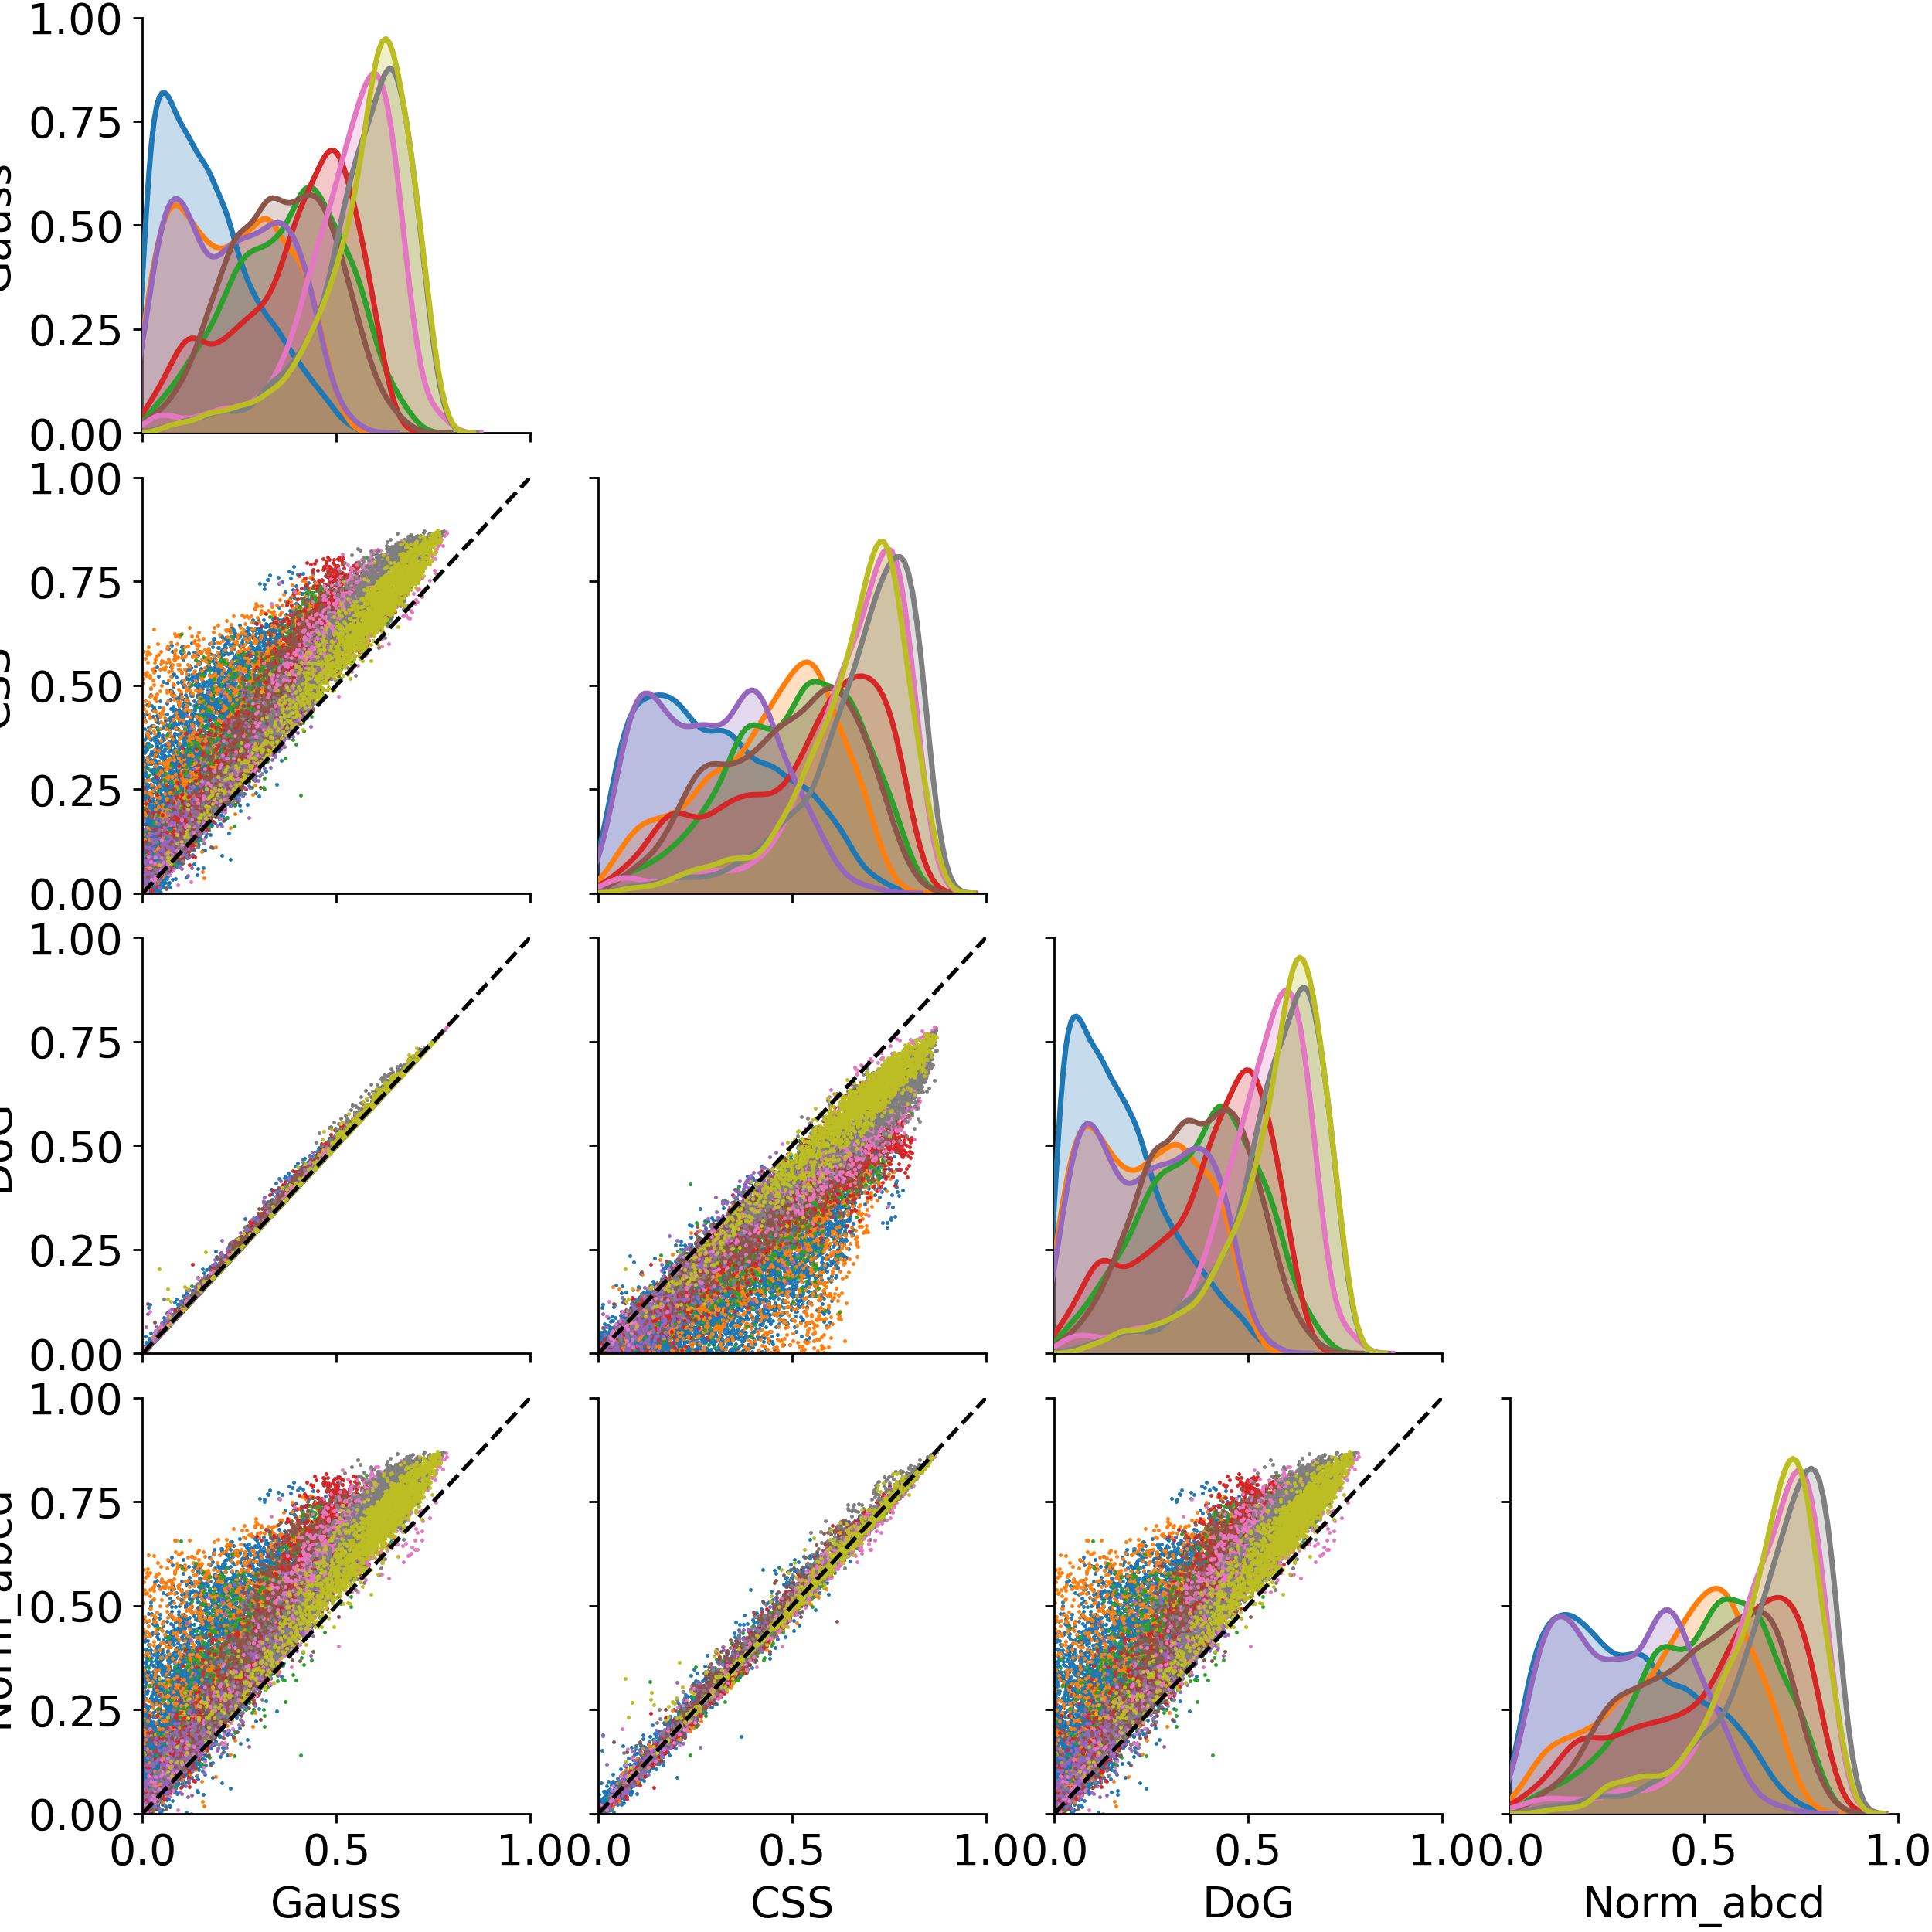

In [74]:
vis_res.set_alpha()


scatter_rois = ['custom.V1','custom.V2', 'custom.V3', 'custom.hV4','custom.VO',
                      'custom.V3AB','custom.LO','custom.TO','custom.IPS'][::-1]#,'custom.FO'
#scatter_rois = ['custom.V1','custom.V2', 'custom.V3']

#scatter_rois = ['custom.LO','custom.TO']

dataframes = []

for subj in ['sub-006', 'sub-007']:

    subj_res = vis_res.main_dict['fsnative']['fit-task-all_fit-runs-5050CVmedian'][subj]
    for roi in scatter_rois:
        alpha_roi = (roi_mask(vis_res.idx_rois[subj][roi], subj_res['Processed Results']['Alpha']['all'])>0.0)
        surround_voxels = subj_res['Processed Results']['RSq']['DoG'][alpha_roi]>subj_res['Processed Results']['RSq']['Gauss'][alpha_roi]
        nonlinear_voxels = subj_res['Processed Results']['RSq']['CSS'][alpha_roi]>subj_res['Processed Results']['RSq']['Gauss'][alpha_roi]
        nonlinear_surround_voxels = nonlinear_voxels * surround_voxels

        models = ['Gauss', 'CSS', 'DoG', 'Norm_abcd']
        
        #which voxels to compare. nonl/surr/all
        mode = 'surr'
        
        if mode=='nonl':
            data={model:subj_res['Processed Results']['RSq'][model][alpha_roi][nonlinear_voxels] for model in models}
            data['ROI'] = [roi] * np.sum(nonlinear_voxels)
        elif mode=='surr':
            data={model:subj_res['Processed Results']['RSq'][model][alpha_roi][surround_voxels] for model in models}
            data['ROI'] = [roi] * np.sum(surround_voxels)
        else:
            data={model:subj_res['Processed Results']['RSq'][model][alpha_roi] for model in models}
            data['ROI'] = [roi] * np.sum(alpha_roi)
            
        dataframes.append(pds.DataFrame(data))



test = pds.concat(dataframes)


g = sns.PairGrid(test, hue="ROI")
#map_lower, map_upper also exist
g.map_offdiag(sns.scatterplot,  s=2, alpha=1, markers='o', linewidth=0)#, linewidth=0.5, edgecolor='white')
#g = g.add_legend(loc=2)
def hide_current_axis(*args, **kwds):
    pl.gca().set_visible(False)

for ax in g.axes.flat[np.arange(len(g.axes.flat))%(len(models)+1)!=0]:
    ax.plot((0, 1), (0, 1), ls="--", color='black')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
g.map_diag(sns.kdeplot, lw=2, shade=True)
g.map_upper(hide_current_axis)

In [ ]:
#the following cells are in case we want to quickly look at some specific model/data timecourse

In [86]:
analysis_settings = '/Users/marcoaqil/analysis_settings_cartesius.yml'

with open(analysis_settings) as f:
    analysis_info = yaml.safe_load(f)

analysis_info=vis_res.main_dict['fsnative']['fit-task-1S_fit-runs-all']['sub-006']['analysis_info']
    
# note that screenshot paths and task names should be in the same order
n_pix = analysis_info["n_pix"]
discard_volumes = analysis_info["discard_volumes"]
screenshot_paths = analysis_info["screenshot_paths"]
screen_size_cm = analysis_info["screen_size_cm"]
screen_distance_cm = analysis_info["screen_distance_cm"]
TR = analysis_info["TR"]

task_names = analysis_info["task_names"]
data_path = analysis_info["data_path"]
fitting_space = analysis_info["fitting_space"]
save_raw_timecourse = analysis_info["save_raw_timecourse"]

filter_predictions = analysis_info["filter_predictions"]
filter_type = analysis_info["filter_type"]

first_modes_to_remove = analysis_info["first_modes_to_remove"]
last_modes_to_remove_percent = analysis_info["last_modes_to_remove_percent"]

window_length = analysis_info["window_length"]
polyorder = analysis_info["polyorder"]
highpass = analysis_info["highpass"]
add_mean = analysis_info["add_mean"]

filter_params = {x:analysis_info[x] for x in ["first_modes_to_remove",
                                              "last_modes_to_remove_percent",
                                              "window_length",
                                              "polyorder",
                                              "highpass",
                                              "add_mean"]}

n_jobs = analysis_info["n_jobs"]
hrf = analysis_info["hrf"]
verbose = analysis_info["verbose"]
rsq_threshold = analysis_info["rsq_threshold"]
models_to_fit = analysis_info["models_to_fit"]
n_batches = analysis_info["n_batches"]
fit_hrf = analysis_info["fit_hrf"]
fix_bold_baseline = analysis_info["fix_bold_baseline"]
if fix_bold_baseline:
    norm_bold_baseline = analysis_info["norm_bold_baseline"]


crossvalidate = analysis_info["crossvalidate"]
save_noise_ceiling = False

if crossvalidate and "fit_task" in analysis_info and "fit_runs" in analysis_info:
    print("Can only specify one between fit_task and fit_runs for crossvalidation.")
    raise IOError
elif crossvalidate and "fit_task" in analysis_info:
    print("Performing crossvalidation over tasks.") 
    fit_task = analysis_info["fit_task"]
    fit_runs = None
elif crossvalidate and "fit_runs" in analysis_info:
    print("Performing crossvalidation over runs.")    
    fit_task = None
    fit_runs = analysis_info["fit_runs"]
    save_noise_ceiling = analysis_info["save_noise_ceiling"]
else:
    print("Not performing crossvalidation.")
    fit_task = None
    fit_runs = None        

single_hrf = analysis_info["single_hrf"]
return_noise_ceiling_fraction = analysis_info["return_noise_ceiling_fraction"]
    
xtol = analysis_info["xtol"]
ftol = analysis_info["ftol"]

dm_edges_clipping = analysis_info["dm_edges_clipping"]
baseline_volumes_begin_end = analysis_info["baseline_volumes_begin_end"]
min_percent_var = analysis_info["min_percent_var"]

param_bounds = analysis_info["param_bounds"]
pos_prfs_only = analysis_info["pos_prfs_only"]
normalize_RFs = analysis_info["normalize_RFs"]


param_constraints = analysis_info["param_constraints"]
surround_sigma_larger_than_centre = analysis_info["surround_sigma_larger_than_centre"]
positive_centre_only = analysis_info["positive_centre_only"]

n_chunks = analysis_info["n_chunks"]
refit_mode = analysis_info["refit_mode"].lower()

if "norm" in models_to_fit and "norm_model_variant" in analysis_info:
    norm_model_variant = analysis_info["norm_model_variant"]
else:
    norm_model_variant = "abcd"

# if "roi_idx_path" in analysis_info:
#     roi_idx_path = analysis_info["roi_idx_path"].replace("$subj$", subj)
#     if os.path.exists(roi_idx_path):
#         roi_idx = np.load(roi_idx_path)
#         print(f"Using ROI mask from: {roi_idx_path}")
#     else:
#         print("ROI mask does not exist. Fitting all.")
#         roi_idx = None
# else:
#     roi_idx = None

if "data_scaling" in analysis_info:
    data_scaling = analysis_info["data_scaling"]
else:
    data_scaling = None

if not param_bounds and norm_model_variant != "abcd":
    print("Norm model variant "+norm_model_variant+" was selected, \
          but param_bounds=False. param_bounds will be set to True.")
    param_bounds = True
    
 
screenshot_paths = [f"/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/FS7_results/timecourses/task-{task}_screenshots" for task in task_names]

data_path = "/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires"

Not performing crossvalidation.


In [80]:
#create stim
prf_stim = create_full_stim(screenshot_paths,
                n_pix,
                discard_volumes,
                baseline_volumes_begin_end,                                         
                dm_edges_clipping,
                screen_size_cm,
                screen_distance_cm,
                TR,
                task_names)

test_prf_stim = prf_stim

Design matrix completed
Design matrix completed
Design matrix completed
Design matrix completed
Design matrix completed


In [23]:
from utils.utils import prepare_data
tc_full_iso_nonzerovar_dict = prepare_data('sub-001',
                                           prf_stim,
                                           test_prf_stim,

                                           discard_volumes,
                                           min_percent_var,
                                           fix_bold_baseline,

                                           filter_type,

                                           filter_params,

                                           data_path,
                                           fitting_space,
                                           data_scaling,
                                           roi_idx,
                                           save_raw_timecourse,

                                           crossvalidate,
                                           fit_runs,
                                           fit_task,
                                           save_noise_ceiling)

For task 1S, hemisphere L of subject sub-001, a total of 2 runs were found.
For task 1S, hemisphere L of subject sub-001, a total of 2 runs were found.
For task 1S, hemisphere R of subject sub-001, a total of 2 runs were found.
For task 1S, hemisphere R of subject sub-001, a total of 2 runs were found.


In [88]:
#initialize models 
prf_stim = vis_res.prf_stim
gg = Iso2DGaussianModel(stimulus=prf_stim,
                          hrf=hrf,
                          filter_predictions=filter_predictions,
                          filter_type=filter_type,
                          filter_params=filter_params,
                          normalize_RFs=normalize_RFs)


In [25]:
timecourse_example = tc_full_iso_nonzerovar_dict['tc'][:5000]
if crossvalidate:
    timecourse_example_test = tc_full_iso_nonzerovar_dict['tc_test'][:5000]

gf = Iso2DGaussianFitter(
    data=timecourse_example, model=gg, n_jobs=8, fit_hrf=fit_hrf)


# gauss grid params
grid_nr = 20
max_ecc_size = prf_stim.screen_size_degrees/2.0
sizes, eccs, polars = max_ecc_size * np.linspace(0.25, 1, grid_nr)**2, \
    max_ecc_size * np.linspace(0.1, 1, grid_nr)**2, \
    np.linspace(0, 2*np.pi, grid_nr)


gf.grid_fit(ecc_grid=eccs,
                polar_grid=polars,
                size_grid=sizes,
                verbose=True,
                n_batches=5,
                pos_prfs_only=pos_prfs_only)

Each batch contains approx. 1000 voxels.


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:   36.7s remaining:   55.1s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:   36.8s finished


In [ ]:
ss=prf_stim.screen_size_degrees
inf=np.inf
eps=0.1
gauss_bounds = [(-2*ss, 2*ss),  # x
                    (-2*ss, 2*ss),  # y
                    (eps, 2*ss),  # prf size
                    (0, +inf),  # prf amplitude
                    (0, +inf)]  # bold baseline


gf.iterative_fit(rsq_threshold=rsq_threshold, verbose=True,
                         bounds=gauss_bounds,
                         constraints=[],
                             xtol=0.01,
                             ftol=0.01)

In [ ]:
gf.iterative_search_params[gf.iterative_search_params[:,-1]>0.05,-1].mean()

In [67]:
gf.crossvalidate_fit(timecourse_example_test,
                    test_stimulus=test_prf_stim,
                    single_hrf=False)

In [89]:
#initialize models
gg_css = CSS_Iso2DGaussianModel(stimulus=prf_stim,
                          hrf=hrf,
                          filter_predictions=False,
                          filter_type=filter_type,
                          filter_params=filter_params,
                          normalize_RFs=normalize_RFs)

gg_norm = Norm_Iso2DGaussianModel(stimulus=prf_stim,
                                    hrf=hrf,
                                    filter_predictions=False,
                                  filter_type=filter_type,
                                  filter_params=filter_params,
                                    normalize_RFs=normalize_RFs)

gg_dog = DoG_Iso2DGaussianModel(stimulus=prf_stim,
                                  hrf=hrf,
                                  filter_predictions=False,
                                  filter_type=filter_type,
                                  filter_params=filter_params,
                                  normalize_RFs=normalize_RFs)

fsnative fit-task-all_fit-runs-5050CVmedian sub-007
fsnative fit-task-all_fit-runs-5050CVmedian sub-006
Norm: [  2.47778173   2.55227566   1.60557033   2.29009813 100.
   0.13843336   5.45019057  10.69314631   6.57266898   0.79871721]
DoG: [  3.33367434   4.02407948   3.15275621   0.66442862 100.
   0.62023766   3.23889284   0.66422295]
Gauss: [  2.98813896   3.23119819   1.5598178    0.04754444 100.
   0.61688427]
CSS: [  2.66988154   2.60702748   0.41547665   3.50564888 100.
   0.13159887   0.72318679]


<IPython.core.display.Javascript object>


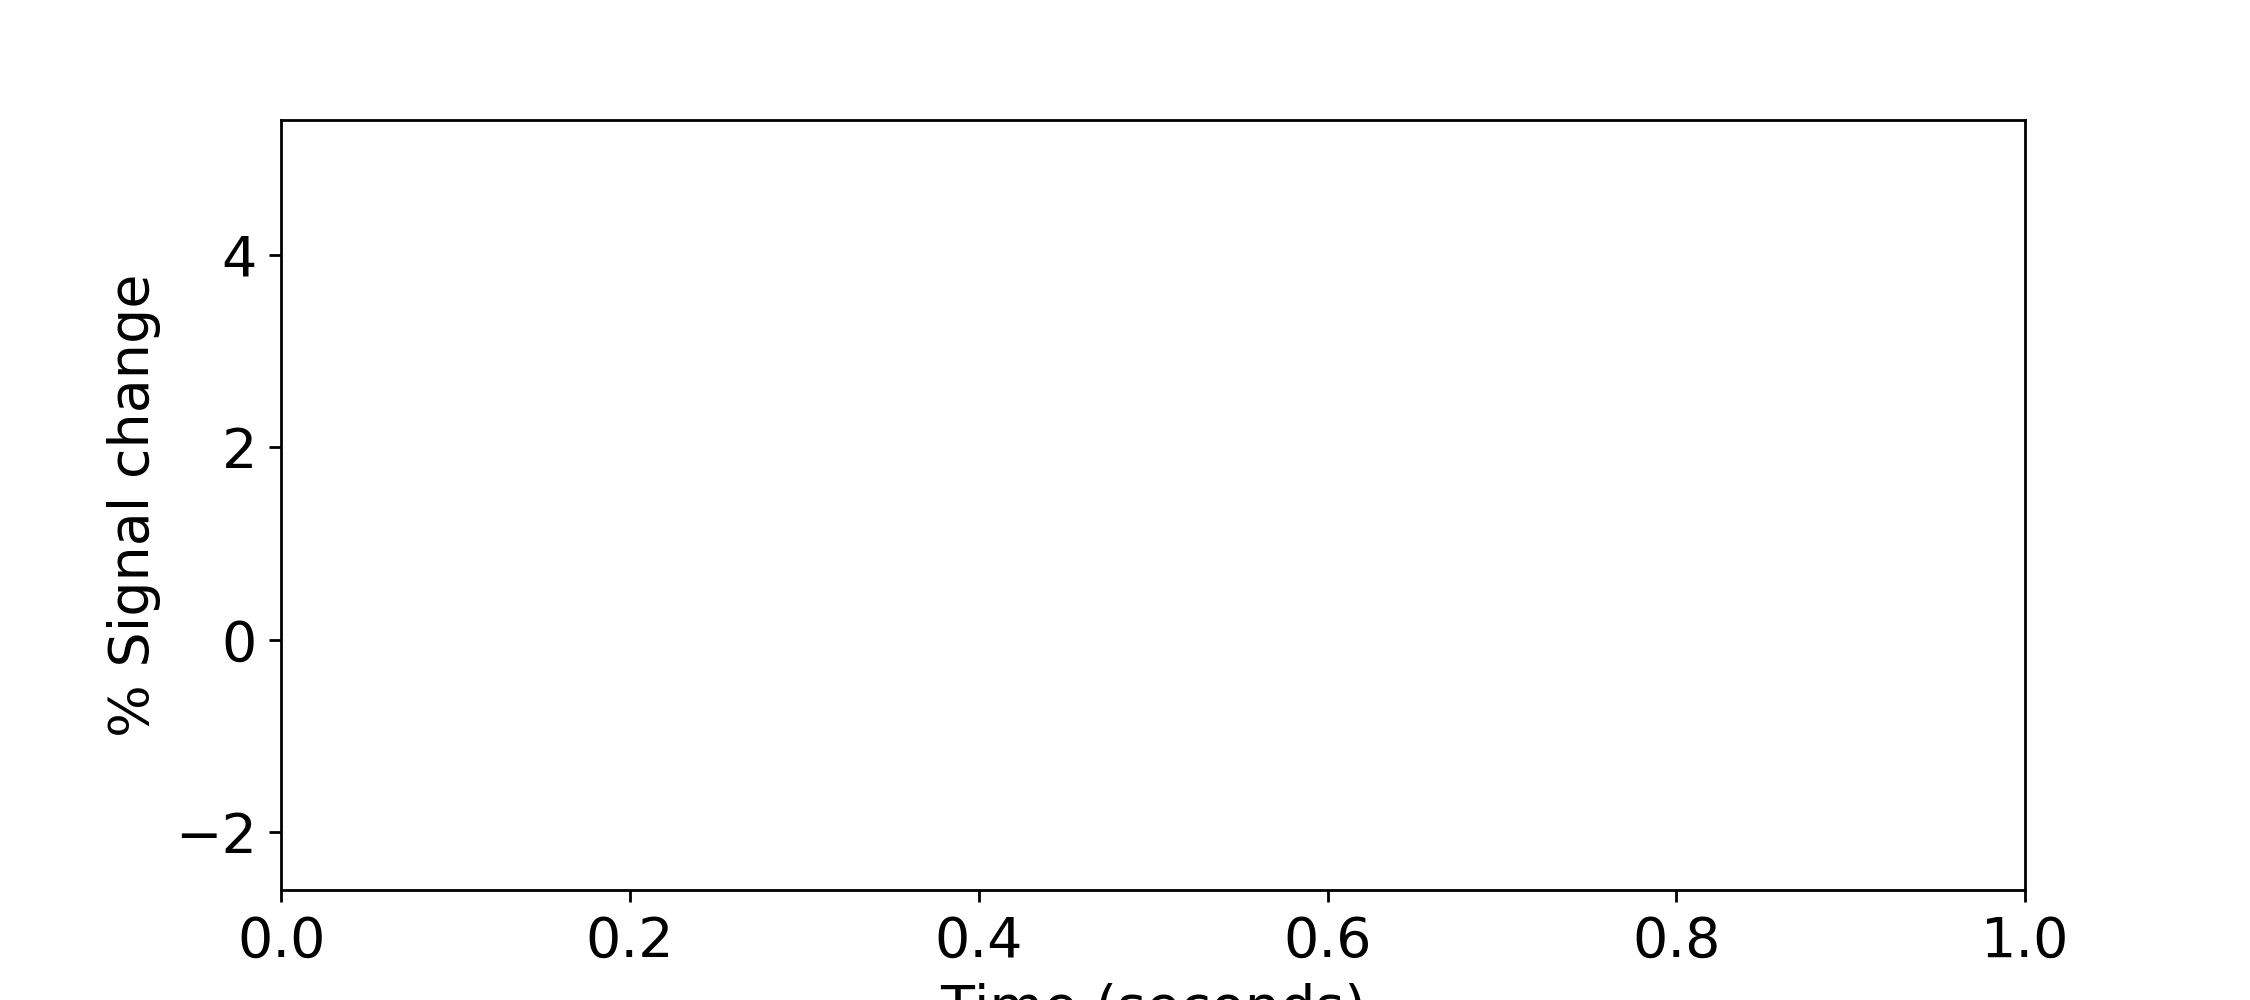

KeyError: 'timecourse_analysis_time'

In [81]:
subj='sub-006'
vis_res.set_alpha(only_models=['Gauss','CSS','DoG','Norm_abcd'])
pl.close('all')

subj_res=vis_res.main_dict['fsnative']['fit-task-1S_fit-runs-all'][subj]


#timecourse = [np.load(f'/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/timecourses_folder/{subj}_timecourse_space-fsnative_task-2R_run-{num}.npy') for num in range(6)]


rois = ['custom.V1', 'custom.V2', 'custom.V3' ,'custom.hV4','custom.VO',
                      'custom.V3AB','custom.LO','custom.TO','custom.IPS']
rsq_thresh = 0.6

alpha_roi = (roi_mask(np.concatenate(tuple([vis_res.idx_rois[subj][roi] for roi in rois])), subj_res['Processed Results']['Alpha']['all']))>rsq_thresh#*(subj_res['Processed Results']['Surround Size (fwatmin)']['Norm']<6)
norm_css_diff = subj_res['Processed Results']['RSq']['Norm_abcd']-subj_res['Processed Results']['RSq']['CSS']
norm_dog_diff = subj_res['Processed Results']['RSq']['Norm_abcd']-subj_res['Processed Results']['RSq']['DoG']
dog_gauss_diff = subj_res['Processed Results']['RSq']['DoG']-subj_res['Processed Results']['RSq']['Gauss']

alpha_roi *= (norm_css_diff>0.1)
alpha_roi *= (norm_dog_diff>0.1)
#alpha_roi *= (subj_res['Processed Results']['RSq']['DoG']-subj_res['Processed Results']['RSq']['Gauss'] >0.05)
#alpha_roi *= (subj_res['Processed Results']['RSq']['CSS']-subj_res['Processed Results']['RSq']['Gauss'] >0.08)

#res_num = np.argsort((subj_res['Processed Results']['RSq']['DoG'][alpha_roi]-subj_res['Processed Results']['RSq']['Gauss'][alpha_roi]))

res_num = np.argsort((norm_css_diff[alpha_roi]))#+(norm_dog_diff[alpha_roi]))
#also with alpha max ecc 5
#nonlinear poster: 5,6 norm_dog_diff subj006 thresh 0.6
#surround poster: 17,18 norm_css_diff subj006 thresh 0.4
for i in range(1,10):
    
    v_num = np.where(np.nonzero(subj_res['mask'])[0] == np.nonzero(alpha_roi)[0][res_num[-i]])[0][0]

    np.set_printoptions(suppress=True)
    print(f"Norm: {subj_res['Results']['Norm_abcd'][v_num]}")
    print(f"DoG: {subj_res['Results']['DoG'][v_num]}")
    print(f"Gauss: {subj_res['Results']['Gauss'][v_num]}")
    print(f"CSS: {subj_res['Results']['CSS'][v_num]}")

    pl.figure(str(i), figsize=(9, 4)) #figsize=(18, 7
    pl.ylim((-2.6,5.4))
    #pl.xlim((0,330))
    pl.ylabel("% Signal change")
    pl.xlabel("Time (seconds)")
    
    cmap = cm.get_cmap('tab10')

    #tc_train = np.load(f"/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/FS7_results/timecourses/{subj}_timecourse_space-fsnative{subj_res['analysis_info']['timecourse_analysis_time']}.npy")[v_num]#np.mean(timecourse[1::2],axis=0)[v_num]#np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/timecourses_folder/sub-006_timecourse_space-fsnative2020-04-20-12-22-52.npy')[v_num]#
    #tc_train *= (100/tc_train.mean())
    #tc_train += (tc_train.mean() - np.median(tc_train[prf_stim.late_iso_dict['2R']]))
    
    #pl.plot(tc_train, label='train', linestyle = ':', color='blue')

    #tc_test = np.load(f"/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/FS7_results/timecourses/{subj}_timecourse-test_space-fsnative{subj_res['analysis_info']['timecourse_analysis_time']}.npy")[v_num]#np.mean(timecourse[::2],axis=0)[v_num]#np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/timecourses_folder/sub-006_timecourse-test_space-fsnative2020-04-20-12-22-52.npy')[v_num]#
    #tc_test *= (100/tc_test.mean())
    #tc_test += (tc_test.mean() - np.median(tc_test[prf_stim.late_iso_dict['2R']]))
    
    mean_data = -100+(tc_train+tc_test)/2
    norm_pred = -100+gg_norm.return_prediction(*list(subj_res['Results']['Norm_abcd'][v_num,:-1].T))[0]
    dog_pred = -100+gg_dog.return_prediction(*list(subj_res['Results']['DoG'][v_num,:-1].T))[0]
    css_pred = -100+gg_css.return_prediction(*list(subj_res['Results']['CSS'][v_num,:-1].T))[0]
    gauss_pred = -100+gg.return_prediction(*list(subj_res['Results']['Gauss'][v_num,:-1].T))[0]
    
    pl.plot(1.5*np.arange(len(tc_test)),np.zeros(len(tc_test)),linestyle='--',linewidth=0.5)
    pl.plot(1.5*np.arange(len(tc_test)),norm_pred, color=cmap(3), label=f"Norm ({subj_res['Results']['Norm_abcd'][v_num][-1]:.2f})")
    pl.plot(1.5*np.arange(len(tc_test)),dog_pred, color=cmap(2), label=f"DoG ({subj_res['Results']['DoG'][v_num][-1]:.2f})")
    pl.plot(1.5*np.arange(len(tc_test)),css_pred, color=cmap(1), label=f"CSS ({subj_res['Results']['CSS'][v_num][-1]:.2f})")    
    pl.plot(1.5*np.arange(len(tc_test)),gauss_pred, color=cmap(0), label=f"Gauss ({subj_res['Results']['Gauss'][v_num][-1]:.2f})") #divide by /noise_ceiling[v_num] to get NC frac
    pl.plot(1.5*np.arange(len(tc_test)),mean_data, label='Data', linestyle = ':', marker='s', markersize=2, color='black', linewidth=1)
    
    pl.fill_between(1.5*np.arange(len(tc_test)), np.min([norm_pred,dog_pred],axis=0), gauss_pred, label='Surround suppression', alpha=0.25,color='gray')
    
    print(f"Norm: {subj_res['Processed Results']['RSq']['Norm_abcd'][alpha_roi][res_num[-i]]}")
    print(f"DoG: {subj_res['Processed Results']['RSq']['DoG'][alpha_roi][res_num[-i]]}")
    print(f"Gauss: {subj_res['Processed Results']['RSq']['Gauss'][alpha_roi][res_num[-i]]}")
    print(f"CSS: {subj_res['Processed Results']['RSq']['CSS'][alpha_roi][res_num[-i]]}")
    pl.legend(ncol=3, fontsize='small')

    print(1-np.sum((gg_norm.return_prediction(*list(subj_res['Results']['Norm_abcd'][v_num,:-1].T))[0]-tc_test)**2, axis=-1)/(tc_test.var(-1)*tc_test.shape[-1]))
    print(1-np.sum((gg.return_prediction(*list(subj_res['Results']['Gauss'][v_num,:-1].T))[0]-tc_test)**2, axis=-1)/(tc_test.var(-1)*tc_test.shape[-1]))
    print(1-np.sum((gg_dog.return_prediction(*list(subj_res['Results']['DoG'][v_num,:-1].T))[0]-tc_test)**2, axis=-1)/(tc_test.var(-1)*tc_test.shape[-1]))

    #print(np.median(tc_test[prf_stim.late_iso_dict['2R']]))

In [340]:
pl.savefig(f"/Users/marcoaqil/PRFMapping/Figures/some_tc.pdf", bbox_inches='tight')

In [73]:
vis_res.main_dict['fsnative']['fit-task-all_fit-runs-all']['sub-001']['Results']['Norm_abcd'].shape

(244679, 10)

<IPython.core.display.Javascript object>


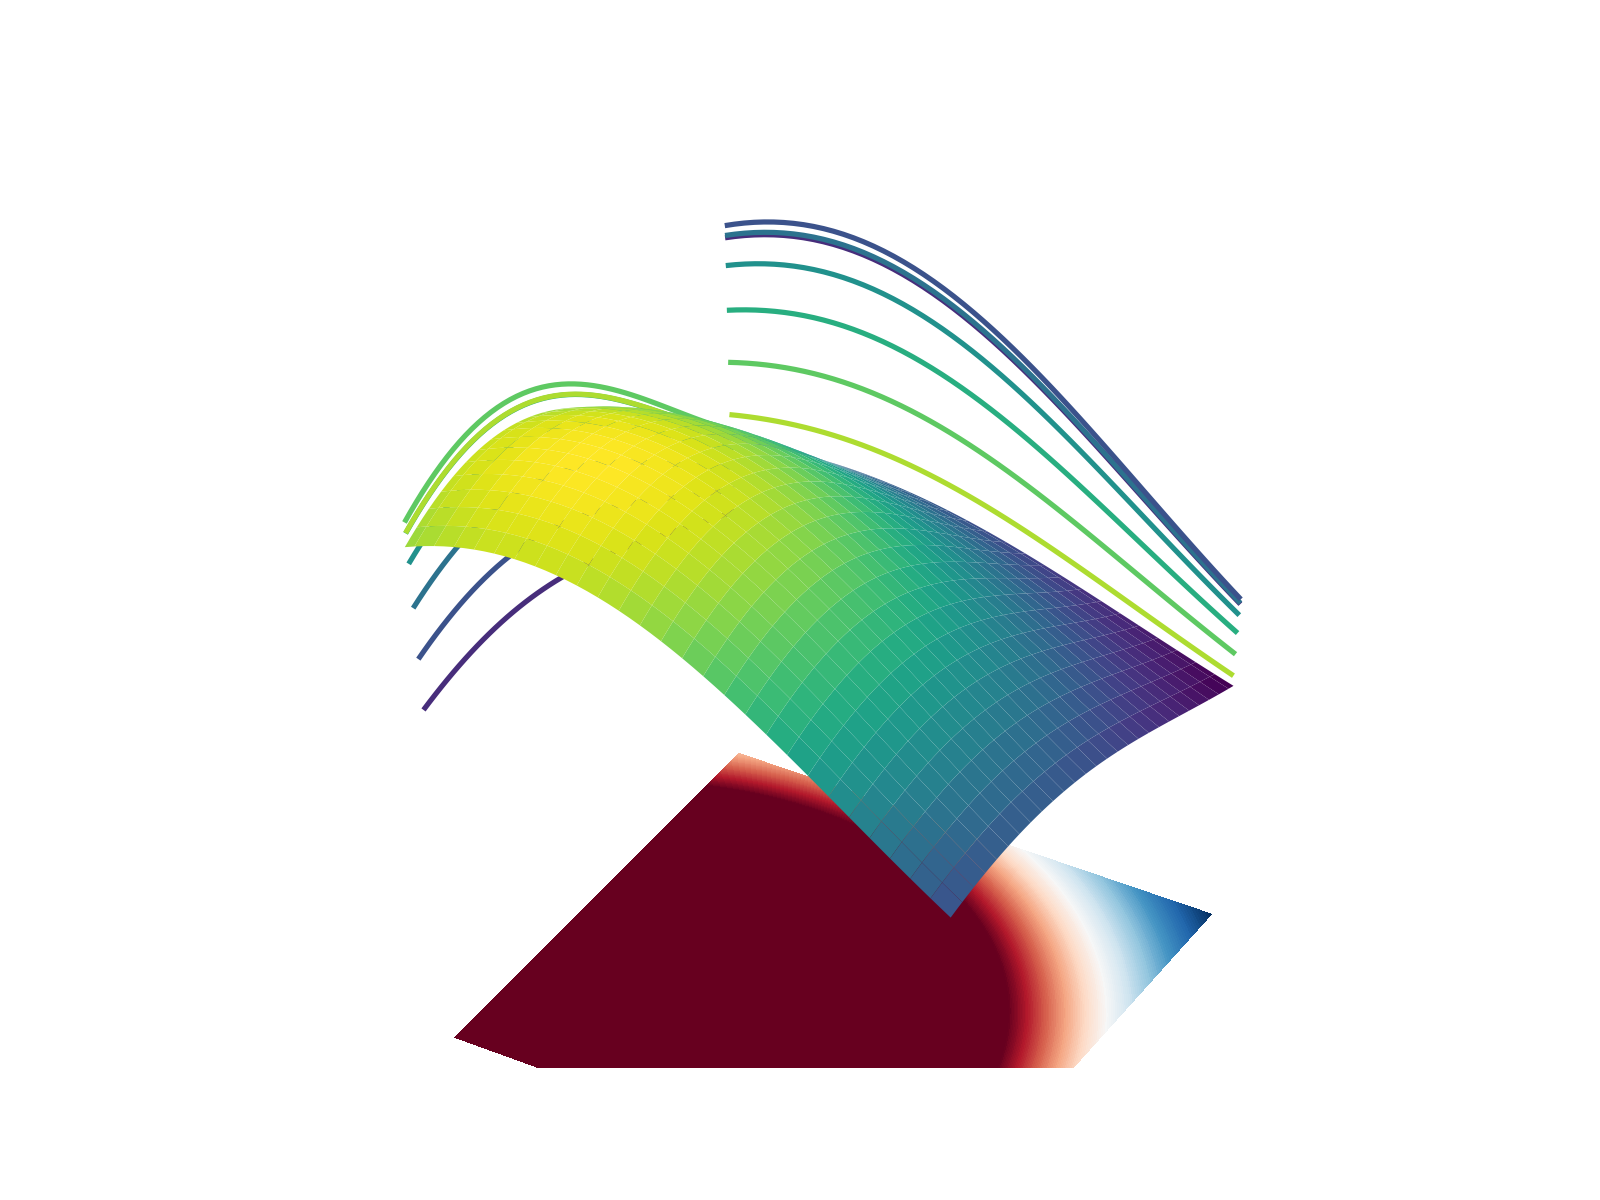

<IPython.core.display.Javascript object>


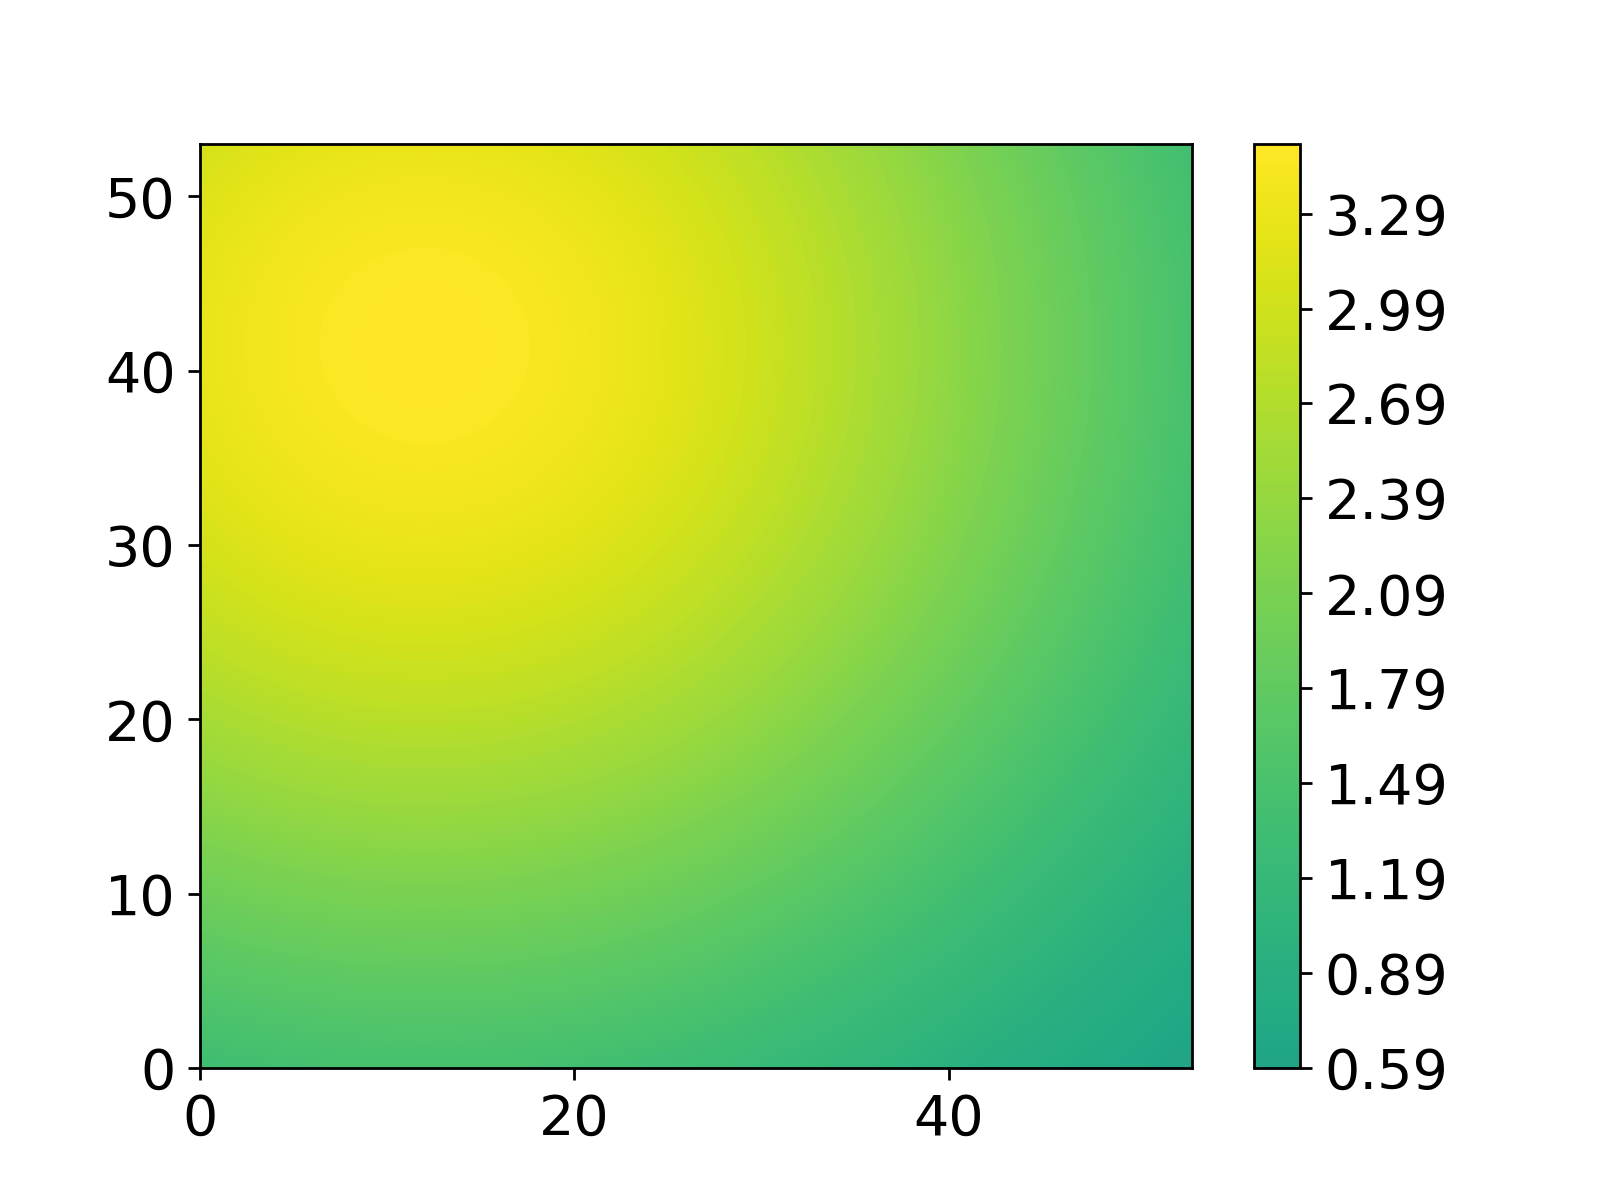

In [306]:
from prfpy.rf import gauss2D_iso_cart
from mpl_toolkits.mplot3d import Axes3D

for model in ['Norm_abcd']:#, 'Gauss', 'CSS', 'DoG']:

    fig = pl.figure(model)
    ax = fig.add_subplot(111, projection='3d', azim=210, elev=50)

    # Hide grid lines
    ax.grid(False)
    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()
    
    params = subj_res['Results'][model][v_num]
    prf = params[3]*np.rot90(gauss2D_iso_cart(x=prf_stim.x_coordinates[...,np.newaxis],
                               y=prf_stim.y_coordinates[...,np.newaxis],
                               mu=(params[0], params[1]),
                               sigma=params[2],
                              normalize_RFs=False).T, axes=(1,2))
    if model == 'CSS':
        prf **= params[5]
    elif model == 'DoG':
        prf -= params[5]*np.rot90(gauss2D_iso_cart(x=prf_stim.x_coordinates[...,np.newaxis],
                               y=prf_stim.y_coordinates[...,np.newaxis],
                               mu=(params[0], params[1]),
                               sigma=params[6],
                              normalize_RFs=False).T, axes=(1,2))
    elif model == 'Norm_abcd':
        prf += params[7]
        prf /= (params[5]*np.rot90(gauss2D_iso_cart(x=prf_stim.x_coordinates[...,np.newaxis],
                               y=prf_stim.y_coordinates[...,np.newaxis],
                               mu=(params[0], params[1]),
                               sigma=params[6],
                              normalize_RFs=False).T, axes=(1,2)) + params[8])
        prf -= params[7]/params[8]
        
    
    surf = ax.plot_surface(X=prf_stim.x_coordinates, Y=prf_stim.y_coordinates, Z=prf[0], cmap='viridis', alpha=1)#, vmin=-0.1, vmax=0.1)
    
    contour_filled = ax.contourf(X=prf_stim.x_coordinates, Y=prf_stim.y_coordinates, Z=prf[0], offset=-prf[0].max()/2, cmap='RdBu_r', levels=300, vmin=prf[0].min(), vmax=prf[0].max()/2)
    contour_side_y = ax.contour(X=prf_stim.x_coordinates, Y=prf_stim.y_coordinates, Z=prf[0], offset=5.3, cmap='viridis', zdir='y')
    contour_side_x = ax.contour(X=prf_stim.x_coordinates, Y=prf_stim.y_coordinates, Z=prf[0], offset=5.3, cmap='viridis', zdir='x')

    #level_surf = ax.plot_surface(X=prf_stim.x_coordinates, Y=prf_stim.y_coordinates, Z=np.zeros_like(prf[0]), alpha=0.5, color='black')
    
    #if model in ['DoG', 'Norm_abcd']:
    #    contour_border = ax.contour(X=prf_stim.x_coordinates, Y=prf_stim.y_coordinates, Z=prf[0], levels=np.array([0]), colors='black', offset=-prf[0].max()/2)  
    #fig.colorbar(surf)
    
    fig2 = pl.figure(model+'flat')
    ax2 = fig2.add_subplot(111)
    #flatsurf = ax2.imshow(prf[0], cmap='RdBu')#, vmin=-0.1, vmax=0.1)
    flatsurf = ax2.contourf(prf[0], cmap='viridis', levels=300, vmin=-prf[0].max(), vmax=prf[0].max())#vmin=-prf[0].max(), vmax=prf[0].max()

    fig2.colorbar(flatsurf)
    #if model in ['DoG', 'Norm_abcd']:
        #ax2.contour(prf[0], levels=np.array([prf[0].min()/2]), colors='black')
    


In [ ]:
##################

In [37]:
noise_ceiling_dict=dict()

subj='sub-006'
timecourse = np.load(f'/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABD_1S/{subj}_timecourse_space-fsnative.npy')
timecourse_test = np.load(f'/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABD_1S/{subj}_timecourse-test_space-fsnative.npy')

subj_res=vis_res.main_dict['fsnative']['ABD_1S_smallbounds'][subj]

n_timepoints = timecourse.shape[-1]
noise_ceiling_scaled_odd = []
noise_ceiling_scaled_even = []

vox_data = timecourse
prediction = timecourse_test

for i in range(timecourse.shape[0]):
   
    sum_pred = np.sum(prediction[i])
    square_norm_pred = np.linalg.norm(prediction[i], ord=2)**2    
    sumd = np.sum(vox_data[i])    
    
    best_slope = (n_timepoints * np.dot(vox_data[i], prediction[i].T) - sumd *
          sum_pred) / (n_timepoints * square_norm_pred - sum_pred**2)
    best_baseline = (sumd - best_slope * sum_pred) / n_timepoints
    
    scaled_pred = prediction[i]*best_slope + best_baseline
    
    rsq = 1-np.sum((vox_data[i]-scaled_pred)**2, axis=-1)/(vox_data[i].shape[-1]*vox_data[i].var(-1))
    
    noise_ceiling_scaled_odd.append(rsq)

vox_data = timecourse_test
prediction = timecourse

for i in range(timecourse.shape[0]):
   
    sum_pred = np.sum(prediction[i])
    square_norm_pred = np.linalg.norm(prediction[i], ord=2)**2    
    sumd = np.sum(vox_data[i])    
    
    best_slope = (n_timepoints * np.dot(vox_data[i], prediction[i].T) - sumd *
          sum_pred) / (n_timepoints * square_norm_pred - sum_pred**2)
    best_baseline = (sumd - best_slope * sum_pred) / n_timepoints
    
    scaled_pred = prediction[i]*best_slope + best_baseline
    
    rsq = 1-np.sum((vox_data[i]-scaled_pred)**2, axis=-1)/(vox_data[i].shape[-1]*vox_data[i].var(-1))
    
    noise_ceiling_scaled_even.append(rsq)   


noise_ceiling_scaled_odd = np.array(noise_ceiling_scaled_odd)
noise_ceiling_scaled_even = np.array(noise_ceiling_scaled_even)
    

noise_ceiling = (noise_ceiling_scaled_odd+noise_ceiling_scaled_even) / 2
noise_ceiling_full = np.zeros(subj_res['Results']['mask'].shape)
noise_ceiling_full[subj_res['Results']['mask']] = noise_ceiling
noise_ceiling_dict[subj] = noise_ceiling_full

In [ ]:
#######various testing cells

<IPython.core.display.Javascript object>


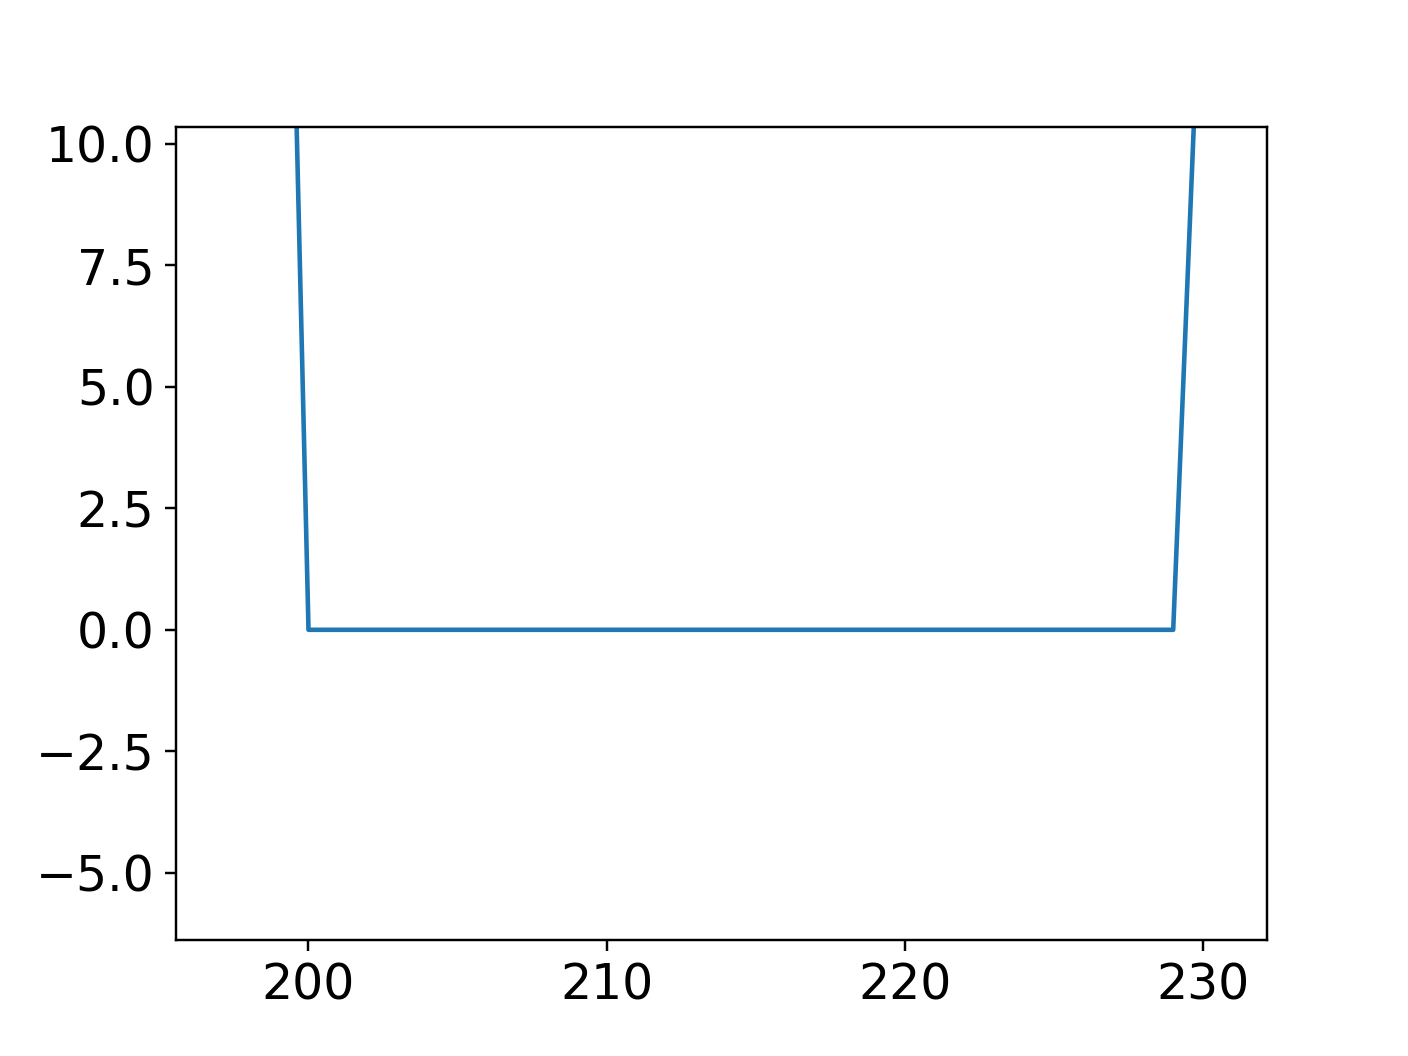

In [369]:
bar_passes = prf_stim.design_matrix.sum((0,1))
fig=pl.figure()
pl.imshow(prf_stim.design_matrix[:,:,13])
fig=pl.figure()
pl.plot(bar_passes)

(2, 27)


<IPython.core.display.Javascript object>


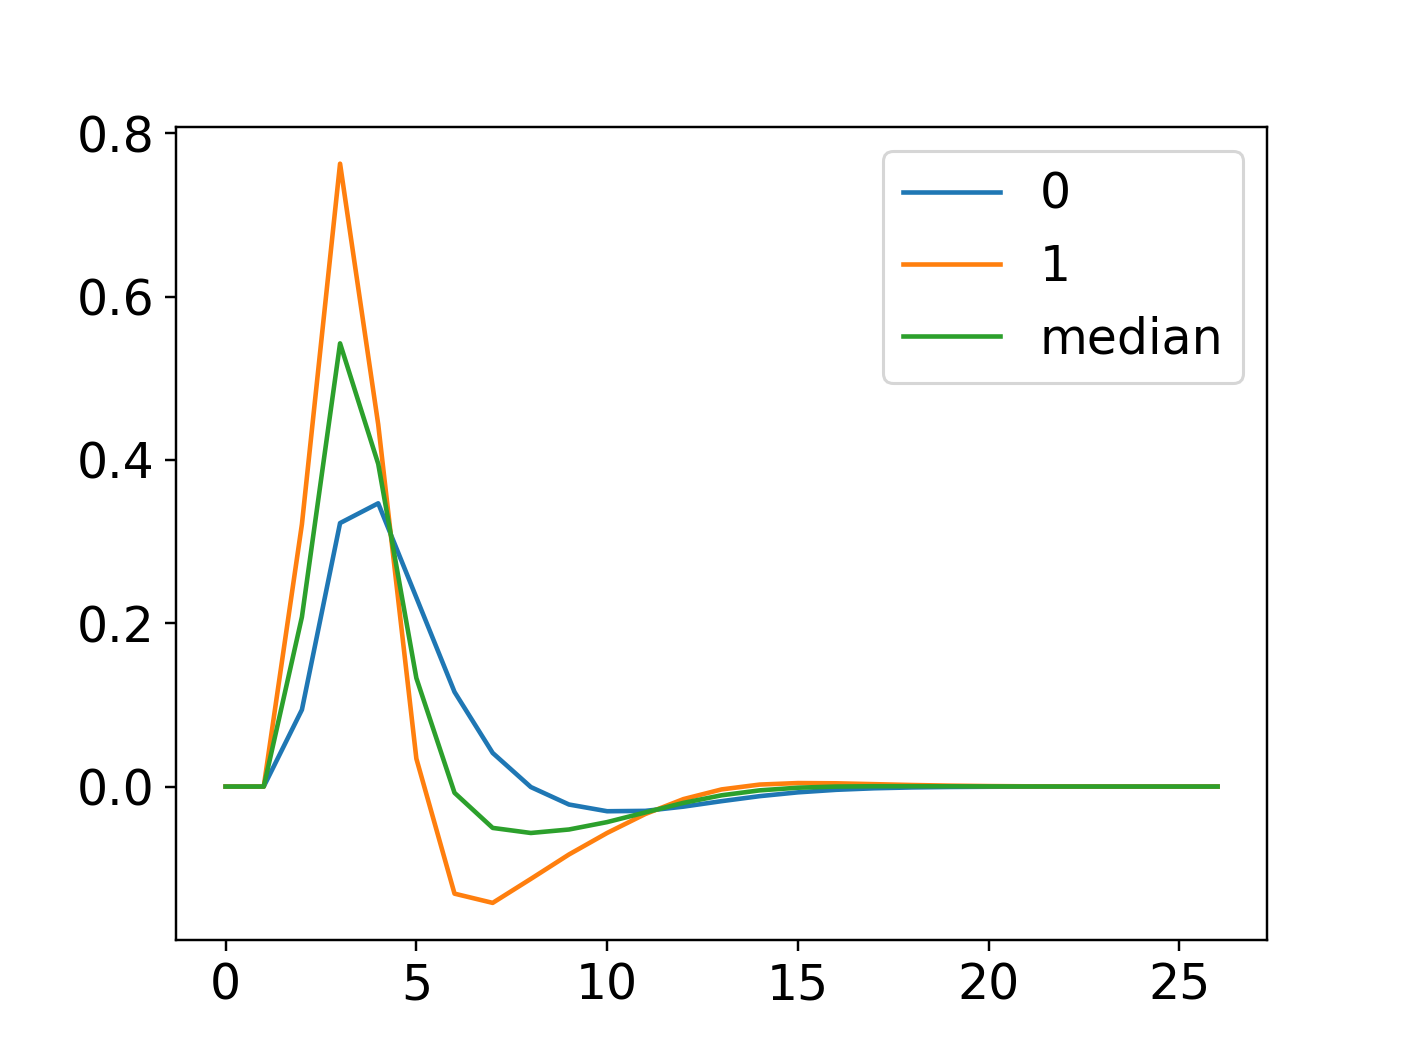

11.477048509899728
5.3548203719686995


In [569]:
current_hrf = gg_norm.create_hrf([[1.0,1.0],[1.0,4.6],[0,0]])
print(current_hrf.shape)
neural_tc = np.ones((1,100))
#neural_tc[1]=1
#neural_tc[2]=2
pl.figure()

for i in range(current_hrf.shape[0]):
    pl.plot(current_hrf[i].T, label=f"{i}")
    print(current_hrf[i].max()/np.abs(current_hrf[i].min()))
pl.plot(np.median(current_hrf, axis=0).T, label='median')
pl.legend()

<IPython.core.display.Javascript object>


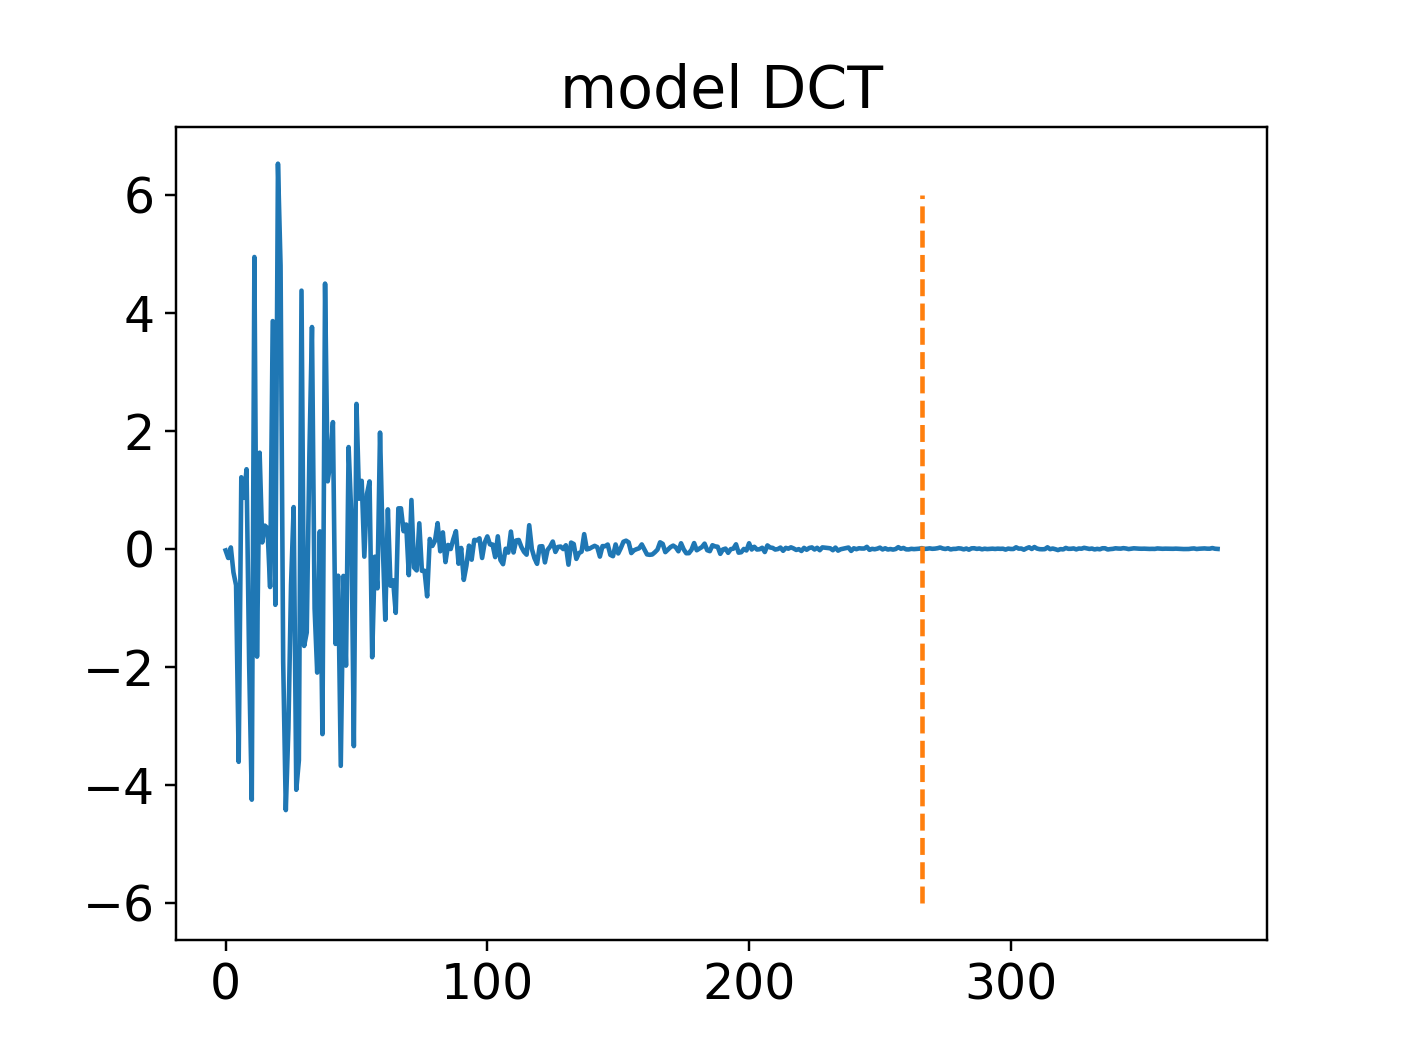

<IPython.core.display.Javascript object>


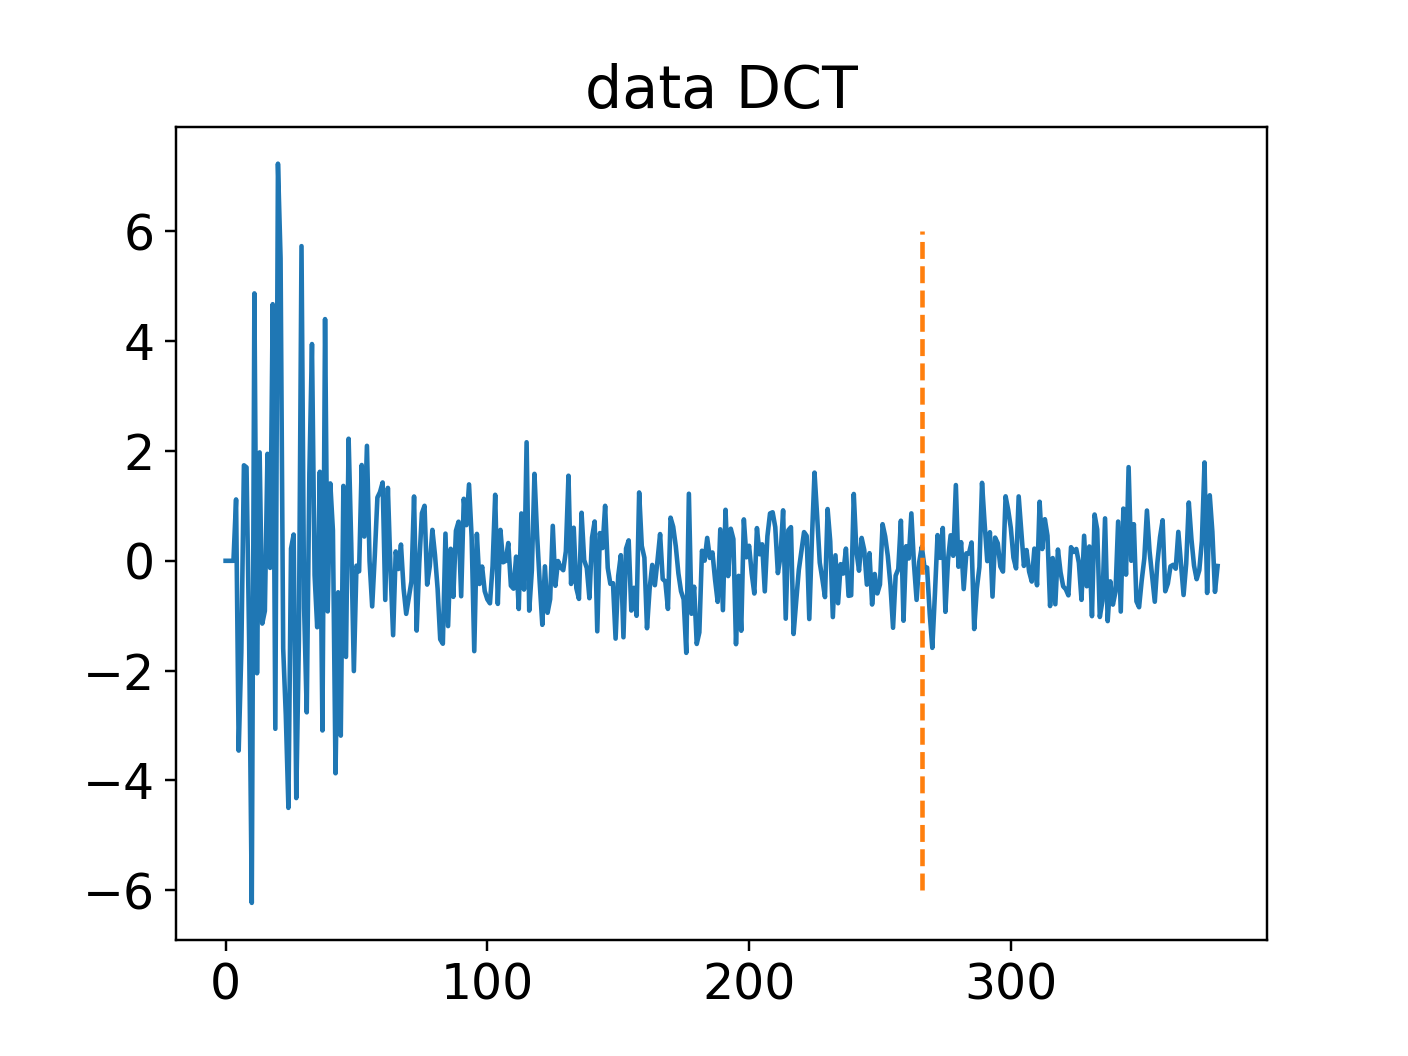

In [468]:
pl.figure()
pl.title('model DCT')
pl.plot(sp.fftpack.dct(gg_norm.return_prediction(*list(subj_res['Results']['Norm'][v_num,:-1].T))[0], norm='ortho', axis=-1)[1:])
pl.plot((380-114)*np.ones(13), np.arange(-6,7), linestyle='--')

pl.figure()
pl.title('data DCT')
pl.plot(sp.fftpack.dct(timecourse[v_num], norm='ortho', axis=-1)[1:])
pl.plot((380-114)*np.ones(13), np.arange(-6,7), linestyle='--')

In [1130]:
current_nc = 1-np.sum((timecourse-timecourse_test)**2, axis=-1)/(timecourse_test.var(-1)*timecourse_test.shape[-1])

print(np.median(current_nc[current_nc>0.0]))

tc_filt = sgfilter_predictions(timecourse,
                                                     window_length=139,
                                                     polyorder=1,
                                                     highpass=True,
                                                     add_mean=True)


tc_filt *= (100/tc_filt.mean(-1)[...,np.newaxis])

#tc_filt *= (100/np.median(tc_filt[...,prf_stim.late_iso_dict['1S']])[np.newaxis,...])
#tc_filt = sp.stats.zscore(tc_filt, axis=-1)
tc_filt += (100-np.median(tc_filt[...,prf_stim.late_iso_dict['1S']], axis=-1))[...,np.newaxis]

tc_test_filt = sgfilter_predictions(timecourse_test,
                                                     window_length=139,
                                                     polyorder=1,
                                                     highpass=True,
                                                     add_mean=True)

tc_test_filt *= (100/tc_test_filt.mean(-1)[...,np.newaxis])

#tc_test_filt = sp.stats.zscore(tc_test_filt,axis=-1)
tc_test_filt += (100-np.median(tc_test_filt[...,prf_stim.late_iso_dict['1S']], axis=-1))[...,np.newaxis]

nc_filt = 1-np.sum((tc_filt-tc_test_filt)**2, axis=-1)/(tc_test_filt.var(-1)*tc_test_filt.shape[-1])

print(np.median(nc_filt[current_nc>0.0]))


0.31834036
0.42667404


In [1231]:
current_nc = 1-np.sum((timecourse-timecourse_test)**2, axis=-1)/(timecourse_test.var(-1)*timecourse_test.shape[-1])

print(np.median(current_nc[current_nc>0.0]))
print(np.sum(current_nc>0.0))

for modes in [5]:
    print(modes)
    for modes_last in [250]:#np.arange(300,380,5):
        print(modes_last)
        trans = sp.fftpack.dct(timecourse, norm='ortho', axis=-1)
        trans[:, :modes] = 0
        trans[:, -modes_last:] = 0

        tc_filt = sp.fftpack.idct(trans, norm='ortho', axis=-1)

        tc_filt += timecourse.mean(-1)[...,np.newaxis]

        tc_filt *= (100/tc_filt.mean(-1))[...,np.newaxis]

        #tc_filt = sp.stats.zscore(tc_filt, axis=-1)
        #tc_filt += (100-np.median(tc_filt[...,prf_stim.late_iso_dict['1S']], axis=-1))[...,np.newaxis]

        trans_test = sp.fftpack.dct(timecourse_test, norm='ortho', axis=-1)
        trans_test[:, :modes] = 0
        trans_test[:, -modes_last:] = 0

        tc_test_filt = sp.fftpack.idct(trans_test, norm='ortho', axis=-1)

        tc_test_filt += timecourse_test.mean(-1)[...,np.newaxis]
        tc_test_filt *= (100/tc_test_filt.mean(-1))[...,np.newaxis]

        #tc_test_filt = sp.stats.zscore(tc_test_filt,axis=-1)
        #tc_test_filt += (100-np.median(tc_test_filt[...,prf_stim.late_iso_dict['1S']], axis=-1))[...,np.newaxis]

        nc_filt = 1-np.sum((tc_filt-tc_test_filt)**2, axis=-1)/(tc_test_filt.var(-1)*tc_test_filt.shape[-1])

        print(np.median(nc_filt[current_nc>0.0]))
        print(np.sum(nc_filt>0.0))


0.31834036
7488
5
250
0.6927979
16392


In [1149]:
prf_stim.late_iso_dict['1S'] = np.array([0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10, 375, 376, 377, 378, 379, 380])

In [1154]:
np.mean(tc_filt[...,prf_stim.late_iso_dict['1S']], axis=-1)

array([100.000015, 100.      ,  99.999985, ...,  99.999985, 100.000015,
        99.99998 ], dtype=float32)

In [721]:
gf_norm.iterative_search_params = subj_res['Results']['Norm']
gf_norm.rsq_mask = subj_res['Results']['Norm'][:,-1]>0.0
gf_norm.crossvalidate_fit(timecourse_test)

In [729]:
np.median(timecourse[v_num, late_iso_dict['1S']])

100.0

<IPython.core.display.Javascript object>


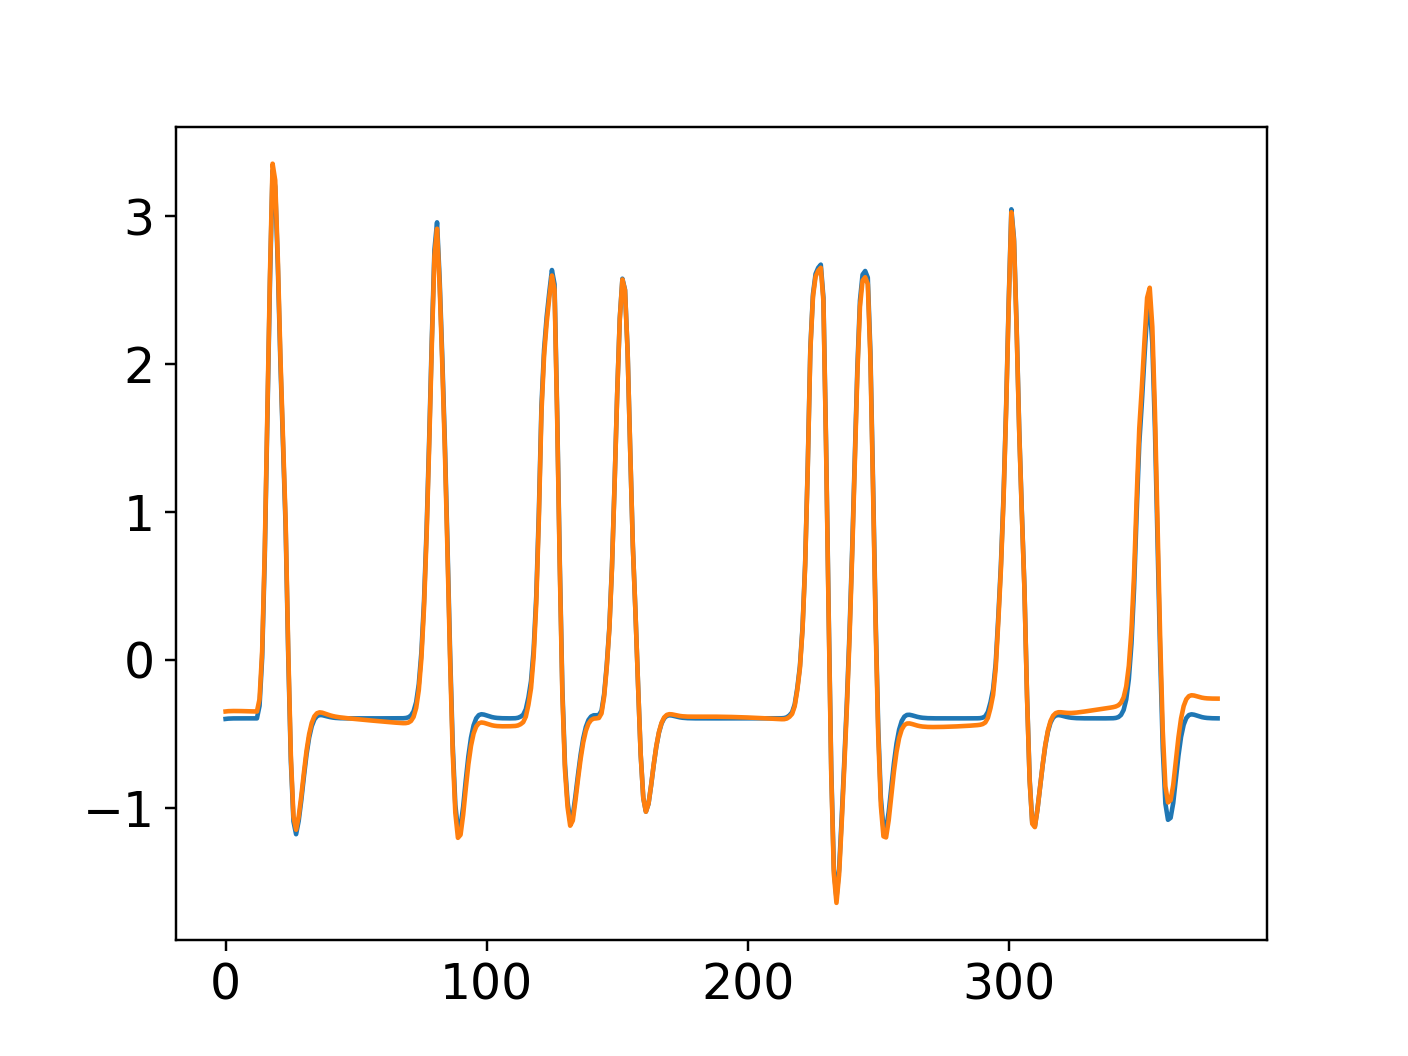

In [1020]:
trans = sp.fftpack.dct(gg_norm.return_prediction(*list(subj_res['Results']['Norm'][v_num,:-1].T))[0], norm='ortho')
pl.figure()
pl.plot(sp.stats.zscore(gg_norm.return_prediction(*list(subj_res['Results']['Norm'][v_num,:-1].T))[0]))
trans[:5]=0
pl.plot(sp.stats.zscore(sp.fftpack.idct(trans, norm='ortho')))

In [694]:
gg_norm.polyorder=1
gg_norm.window_length='adaptive'
gg_norm.add_mean=True
gg_norm.filter_predictions=True
gg_norm.highpass=True

In [573]:
norm_tc_fft=gg_norm.return_prediction(*list(np.array([[0,0,1,0.8,100,0.1,3,1,2],
                                                      [0,0,1,0.8,100,0.1,3,1,2]]).T))+0.5*np.random.rand(norm_tc_fft.shape[0], norm_tc_fft.shape[1])

norm_tc_ndi=gg_norm.return_prediction(*list(gf_norm.iterative_search_params[:,:-1].T))
print(gf_norm.iterative_search_params)

KeyboardInterrupt: 

In [496]:
gf_norm = Norm_Iso2DGaussianFitter(data=timecourse,
                                       model=gg_norm,
                                       n_jobs=1)

In [546]:
gf_norm.iterative_search_params=np.array([[0,0,1,0.8,100,0.1,3.0,1,2,2,0,1],
                                                      [0,0,1,0.8,100,0.1,3.0,1,2,2,0,1]])

gf_norm.iterative_search_params=np.ones((tc_full_iso_nonzerovar_dict['tc'].shape[0],10))
gf_norm.rsq_mask=np.ones(tc_full_iso_nonzerovar_dict['tc'].shape[0]).astype('bool')
gf_norm.crossvalidate_fit(tc_full_iso_nonzerovar_dict['tc_test'])#norm_tc_fft+0.5*np.random.rand(norm_tc_fft.shape[0], norm_tc_fft.shape[1]))

Error occurred during predictions savgol filtering.                  Using unfiltered prediction instead


In [838]:
gf_norm.crossvalidate_fit(timecourse_test)

0.043622790158751576

In [535]:
gf_norm.iterative_search_params

array([[  0.        ,   0.        ,   1.        ,   0.8       ,
        100.        ,   0.1       ,   3.        ,   1.        ,
          2.        ,   2.        ,   0.        ,   0.55912334],
       [  0.        ,   0.        ,   1.        ,   0.8       ,
        100.        ,   0.1       ,   3.        ,   1.        ,
          2.        ,   2.        ,   0.        ,   0.497631  ]])

0.9979048968921437


<IPython.core.display.Javascript object>


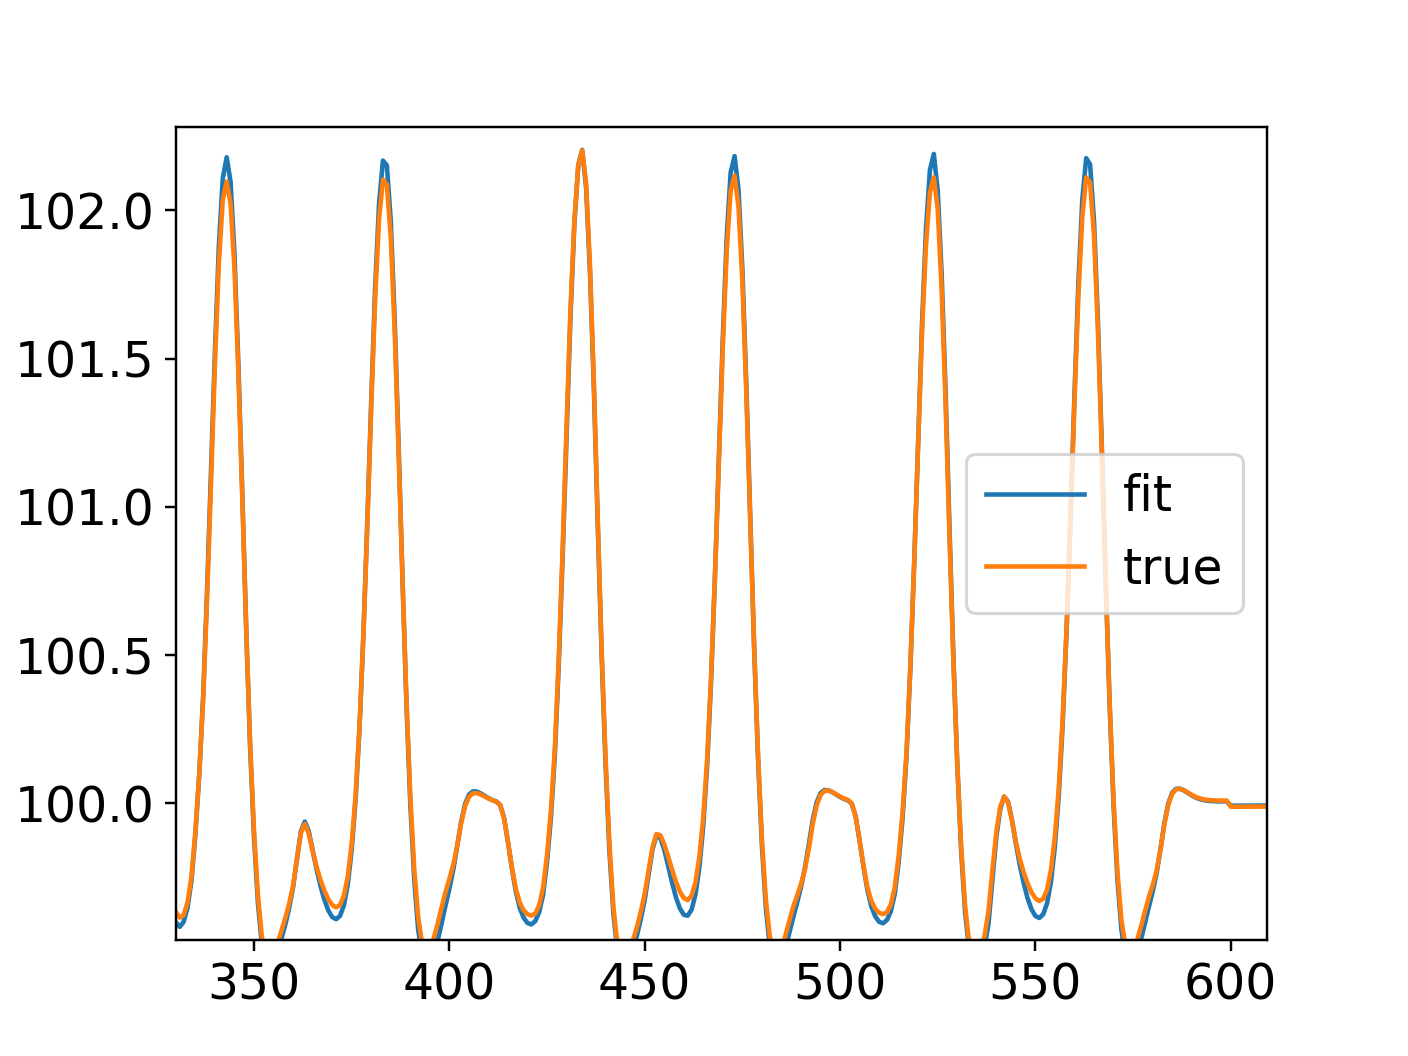

In [411]:
print(1-((norm_tc_ndi[0]-norm_tc_fft[0])**2).sum()/(len(norm_tc_fft[0])*norm_tc_fft[0].var()))
pl.figure()

pl.plot(norm_tc_ndi[0],label='fit')
pl.plot(norm_tc_fft[0],label='true')

pl.legend()

In [431]:
late_iso_dict = prf_stim.late_iso_dict

task_lengths = prf_stim.task_lengths
print(np.any(np.median(tc_full_iso_nonzerovar_dict['tc_test'][:,late_iso_dict['1S']], axis=-1) != 100 ))

False


In [436]:
np.corrcoef(tc_full_iso_nonzerovar_dict['tc_test'][0:2],tc_full_iso_nonzerovar_dict['tc'][0:2])

array([[ 1.        ,  0.27455435,  0.00772459,  0.01178409],
       [ 0.27455435,  1.        , -0.00728552, -0.00978152],
       [ 0.00772459, -0.00728552,  1.        ,  0.24647118],
       [ 0.01178409, -0.00978152,  0.24647118,  1.        ]])

In [365]:
#print(np.max(norm_tc_fft[0]))
print(norm_tc_fft[0][late_iso_dict['1R']].mean())
print(norm_tc_fft[0][task_lengths[0]+late_iso_dict['1S']].mean())
print(norm_tc_fft[0][np.sum(task_lengths[:2])+late_iso_dict['2R']].mean())
print(norm_tc_fft[0][np.sum(task_lengths[:3])+late_iso_dict['4F']].mean())
print(norm_tc_fft[0][np.sum(task_lengths[:4])+late_iso_dict['4R']].mean())

99.28377
99.30392
99.81529
99.64278
99.63825


<IPython.core.display.Javascript object>


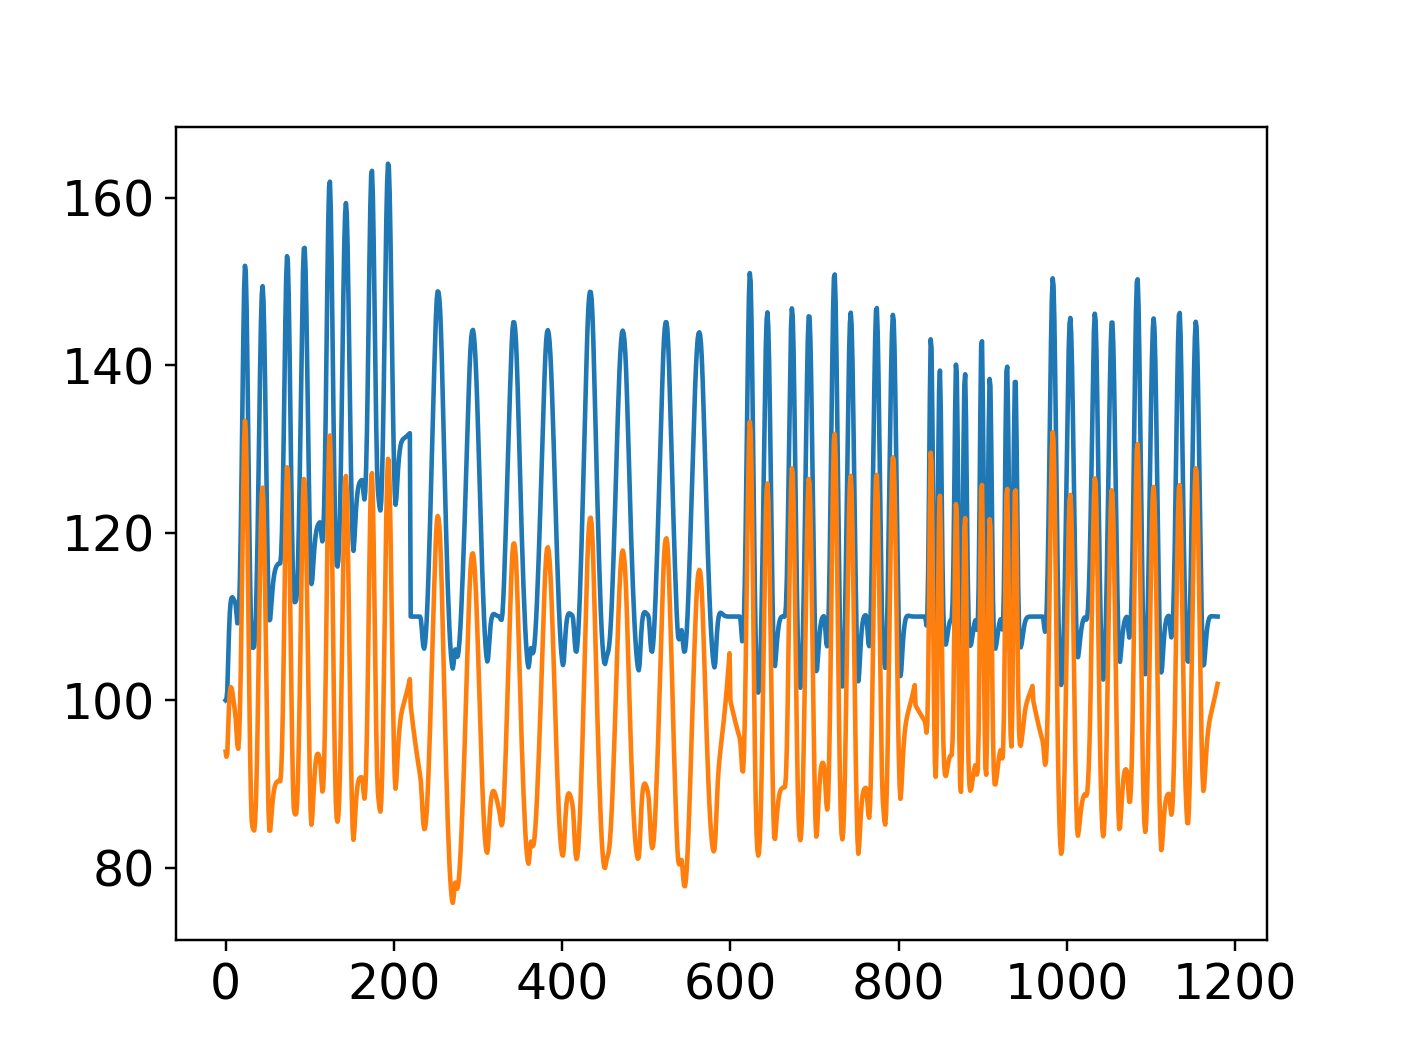

In [840]:
norm_tc_ndi[0][:220] += 0.1*np.arange(220)
pl.figure()
pl.plot(norm_tc_ndi[0])
norm_tc_fft = 100+sgfilter_predictions(norm_tc_ndi, window_length=139, polyorder=3,
                         highpass=True, add_mean=True, task_lengths=task_lengths,
                         task_names=task_names, late_iso_dict=late_iso_dict)
pl.plot(norm_tc_fft[0])

In [124]:
timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_timecourse_space-fsnative.npy')


In [13]:

tc_vox = timecourse[12,:]

In [ ]:
%matplotlib notebook
rsq_thresh=0.7

roi = 'visual_system'
#alpha_roi = roi_mask(idx_rois[roi],alpha)>rsq_thresh

alpha_roi = alpha>rsq_thresh#roi_mask(idx_rois[roi],alpha)>rsq_thresh

#create timecourses
vox_num=np.argmin((rsq[:,3]-rsq[:,1])*alpha_roi)#50370



vox_num = np.sum(nonzerovar_mask[:vox_num])
tc_vox=timecourse[vox_num] - 100




#norm_grid_tc=gg_norm.return_prediction(*list(norm_grid[vox_num,:-1]))
norm_tc=gg_norm.return_prediction(*list(norm_res[vox_num,:-1]))  - 100
gauss_tc=gg.return_prediction(*list(gauss[vox_num,:-1])) - 100
css_tc=gg_css.return_prediction(*list(css_res[vox_num,:-1])) - 100
dog_tc=gg_dog.return_prediction(*list(dog_res[vox_num,:-1])) - 100
norm_updated=gg_norm.return_prediction(*list(gf_norm.iterative_search_params[0,:-1])) - 100
css_updated=gg_css.return_prediction(*list(gf_css.iterative_search_params[0,:-1])) - 100

times=np.arange(len(tc_vox))*1.5

fig=pl.figure(figsize=(4, 9))
pl.plot(times[:task_lengths[0]], tc_vox[:task_lengths[0]], label='Data (Cond. a)', marker='s', markersize=4, color='black', linestyle='-') 
pl.plot(times[task_lengths[0]:np.sum(task_lengths[:2])], tc_vox[task_lengths[0]:np.sum(task_lengths[:2])], label='Cond. b', marker='o', markersize=4, color='black', linestyle='-') 
pl.plot(times[np.sum(task_lengths[:2]):np.sum(task_lengths[:3])], tc_vox[np.sum(task_lengths[:2]):np.sum(task_lengths[:3])], label='Cond. c', marker='^', markersize=4, color='black', linestyle='-') 
pl.plot(times[np.sum(task_lengths[:3]):np.sum(task_lengths[:4])], tc_vox[np.sum(task_lengths[:3]):np.sum(task_lengths[:4])], label='Cond. d', marker='v', markersize=4, color='black', linestyle='-') 
pl.plot(times[np.sum(task_lengths[:4]):np.sum(task_lengths[:5])], tc_vox[np.sum(task_lengths[:4]):np.sum(task_lengths[:5])], label='Cond. e', marker='D', markersize=4, color='black', linestyle='-') 

pl.plot(times, gauss_tc, color='blue',linewidth=2)#,label='Gauss')
pl.plot(times, css_tc, color='orange',linewidth=2)#,label='CSS')
pl.plot(times, dog_tc, color='green',linewidth=2)#,label='DoG')
pl.plot(times, norm_tc, color='red',linewidth=2)#, label='Norm')


pl.plot(norm_updated,label='new norm')
pl.plot(css_updated,label='new css')
pl.legend(loc=1)


pl.xlabel('Time (s)')
#pl.ylabel('BOLD signal change (%)')

#pl.xlim(42,82)
#pl.xlim(350,390)
#pl.xlim(905,945)
#pl.xlim(1226.5,1266.5)
#pl.xlim(1663,1703)
#pl.ylim(-3,6)

np.set_printoptions(suppress=True)

print("gauss rsq: "+str(1-np.sum((tc_vox-gauss_tc)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
print("css rsq: "+str(1-np.sum((tc_vox-css_tc)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
print("dog rsq: "+str(1-np.sum((tc_vox-dog_tc)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
print("norm rsq: "+str(1-np.sum((tc_vox-norm_tc)**2)/(timecourse.shape[-1]*np.var(tc_vox))))
print("new norm rsq: "+str(1-np.sum((tc_vox-norm_updated)**2)/(timecourse.shape[-1]*np.var(tc_vox))))

print("new css rsq: "+str(1-np.sum((tc_vox-css_updated)**2)/(timecourse.shape[-1]*np.var(tc_vox))))


print("gauss params")
print(gauss[vox_num])
print("css params")
print(css_res[vox_num])
print("dog params")
print(dog_res[vox_num])
print("norm params")
print(norm_res[vox_num])

#print("new norm params")
#print(gf_norm.iterative_search_params[0])

#norm_res[vox_num] = gf_norm.iterative_search_params[0]

#pl.savefig('/Users/marcoaqil/PRFMapping/Figures/'+subj+'_1S_tc.png', dpi=200, bbox_inches='tight')

In [653]:
print(tc_vox[late_iso_dict['1R']].mean())
print(tc_vox[task_lengths[0]+late_iso_dict['1S']].mean())
print(tc_vox[np.sum(task_lengths[:2])+late_iso_dict['2R']].mean())
print(tc_vox[np.sum(task_lengths[:3])+late_iso_dict['4F']].mean())
print(tc_vox[np.sum(task_lengths[:4])+late_iso_dict['4R']].mean())

80890.47
80890.46
80890.45
80890.45
80890.45


In [486]:
from scipy.optimize import LinearConstraint, NonlinearConstraint

inf = 1e6
eps = 1e-1
ss = prf_stim.screen_size_degrees


gf_norm = Norm_Iso2DGaussianFitter(data=norm_tc_fft,
                                       model=gg_norm,
                                       n_jobs=1)
# gf_css = CSS_Iso2DGaussianFitter(data=tc_vox.reshape(-1,tc_vox.shape[-1]),
#                                        model=gg_css,
#                                        n_jobs=1)


constraints_dog = []
constraints_norm = []

In [134]:
#enforcing surround size larger than prf size
A_ssc_dog = np.array([[0,0,-1,0,0,0,1]])
A_ssc_norm = np.array([[0,0,-1,0,0,0,1,0,0]])

constraints_dog.append(LinearConstraint(A_ssc_dog,
                                                lb=0,
                                                ub=+inf))

constraints_norm.append(LinearConstraint(A_ssc_norm,
                                                lb=0,
                                                ub=+inf))

if pos_prfs_only:
        #enforcing positive central amplitude
    def positive_centre_prf_dog(x):
        if normalize_RFs:
            return x[3]/(2*np.pi*x[2]**2)-x[5]/(2*np.pi*x[6]**2)
        else:
            return x[3] - x[5]

    def positive_centre_prf_norm(x):
        if normalize_RFs:
            return (x[3]/(2*np.pi*x[2]**2)+x[7])/(x[5]/(2*np.pi*x[6]**2)+x[8]) - x[7]/x[8]
        else:
            return (x[3]+x[7])/(x[5]+x[8]) - x[7]/x[8]

    constraints_dog.append(NonlinearConstraint(positive_centre_prf_dog,
                                                lb=0,
                                                ub=+inf))
    constraints_norm.append(NonlinearConstraint(positive_centre_prf_norm,
                                            lb=0,
                                            ub=+inf))

In [327]:
start = np.ones((1,10))#np.copy(norm_res[vox_num].reshape(-1,10))
#start = np.insert(start, -1, 1.0, axis=-1)
#start = np.insert(start, -1, 0.0, axis=-1)
#start[0,4] = 60000
#start[0,8] = 1
#start[0,7] = 0
#print(gf_norm.rsq_mask.shape)
gf_norm.iterative_fit(rsq_threshold=0.0, verbose=True,
                              starting_params=start,#norm_grid[vox_num].reshape(-1,norm_grid[vox_num].shape[-1]),
                                      bounds=[(-2*ss, 2*ss),  # x
                                               (-2*ss, 2*ss),  # y
                                               (1e-2, 2*ss),  # prf size
                                               (0, inf),  # prf amplitude
                                               (100, 100),  # bold baseline
                                               (1, 1),  # surround amplitude
                                               (1e-2, 4*ss),  # surround size
                                               (0, inf),  # neural baseline
                                               (1, 1)],#, # surround baseline
                                             #(0,10),
                                             #(0,10)],  
                                       fit_hrf=False,
                                         constraints=[],
                     xtol=1e-10,
                     ftol=1e-10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Performing bounded, constrained minimization (trust-constr).


/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained

/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`xtol` termination condition is satisfied.
Number of iterations: 434, function evaluations: 4950, CG iterations: 1807, optimality: 1.15e-05, constraint violation: 0.00e+00, execution time: 5.5e+01 s.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.8s finished


In [329]:
np.set_printoptions(suppress=True)
print(gf_norm.iterative_search_params)

[[ -0.00113465   0.00682906   0.89537049   5.03997013 100.
    1.           1.78311059   0.41833873   1.           0.99801984]]


In [406]:
np.set_printoptions(suppress=True)
#gf_norm.iterative_search_params[0,-2]=1
#gf_norm.iterative_search_params[0,-4]=6
#gf_norm.iterative_search_params[0,-5]=3

#gf_norm.iterative_search_params[0,3]=6000
#gf_norm.iterative_search_params[0,4]=80000
print(gf_norm.iterative_search_params[0])
print(norm_res[vox_num])
#print(gf_norm.iterative_search_params[0] - norm_res[vox_num])
print(norm_grid[vox_num])

[  1.61262881  -3.27140535   1.3109588   30.25251258  97.36434091
   3.37460018   1.43215614 101.72094163  92.30392389   0.70895484]
[  1.6126288   -3.27140605   1.31095913  30.25247063  97.36434061
   3.37459472   1.43215644 101.72093309  92.30388769   0.70895484]
[  1.57078693  -3.23347827   1.5173385   15.84158134  98.51573944
   1.           3.           0.         100.           0.69985837]


In [399]:
start = np.copy(css_res[vox_num].reshape(-1,7))
start = np.insert(start, -1, 1.0, axis=-1)
start = np.insert(start, -1, 0.0, axis=-1)

gf_css.iterative_fit(rsq_threshold=0, verbose=True,
                              starting_params=gf_css.iterative_search_params,
                             bounds=[(-2*ss, 2*ss),  # x
                                     (-2*ss, 2*ss),  # y
                                     (eps, 2*ss),  # prf size
                                     (-inf, +inf),  # prf amplitude
                                     (0, +inf),  # bold baseline
                                     (0.001, 3),
                                             (0,10),
                                             (0,10)],  # CSS exponent
                                       gradient_method='no',
                                       fit_hrf=True)

Using no-gradient minimization


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


`xtol` termination condition is satisfied.
Number of iterations: 208, function evaluations: 1854, CG iterations: 1089, optimality: 3.60e-04, constraint violation: 0.00e+00, execution time: 2e+01 s.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.8s finished


In [400]:
np.set_printoptions(suppress=True)
print(gf_css.iterative_search_params[0])

[ 1.55949306 -3.33135418  0.73937069  2.54859146 98.45336773  0.19237379
  2.95818123  0.00000049  0.78626246]


In [37]:
anp = norm_res[:10,:-1]#gf_norm.iterative_search_params[0]
agp = gauss[:10,:-1]
acp = css_res[:10,:-1]#gf_css.iterative_search_params[0]
adp = dog_res[:10,:-1]


x=np.linspace(-20,20,1000)
gauss_profile = agp[...,3] * np.exp(-0.5*x[...,np.newaxis]**2 / agp[...,2]**2)

half_max = np.max(gauss_profile, axis=0)/2

css_profile = (acp[3] * (np.exp(-0.5*x**2 / acp[2]**2))**acp[5])
dog_profile = adp[3] * np.exp(-0.5*x**2 / adp[2]**2) - adp[5] * np.exp(-0.5*x**2 / adp[6]**2)
norm_profile = (anp[3] * np.exp(-0.5*x**2 / anp[2]**2) + anp[7]) / (anp[5] * np.exp(-0.5*x**2 / anp[6]**2) + anp[8])
pl.figure()
pl.plot(x,norm_profile,label='norm')
pl.plot(x,css_profile,label='css')
pl.plot(x,dog_profile,label='dog')
pl.plot(x,gauss_profile,label='gauss')
pl.legend()

ValueError: operands could not be broadcast together with shapes (1000,) (6,) 

In [42]:
print(half_max.shape)
x[np.argmin(np.abs(half_max-gauss_profile), axis=0)]

(10,)


array([-0.42042042, -0.5005005 , -0.54054054, -0.54054054, -0.54054054,
       -0.38038038, -0.54054054, -0.62062062, -0.38038038, -0.66066066])

In [43]:
agp

array([[2.39757873e+00, 2.60430189e-01, 3.50643828e-01, 1.13346322e+02,
        6.86608990e+04],
       [2.54802888e+00, 3.85879235e-01, 4.30552282e-01, 9.51115676e+01,
        6.96927229e+04],
       [2.58749607e+00, 4.17583105e-01, 4.51059228e-01, 9.68074753e+01,
        7.06364901e+04],
       [2.73111188e+00, 4.66150961e-01, 4.50371759e-01, 1.15703847e+02,
        6.45847187e+04],
       [2.61016573e+00, 6.21102360e-01, 4.65716762e-01, 8.71259269e+01,
        5.91878856e+04],
       [2.37924514e+00, 2.76602634e-01, 3.17047987e-01, 1.27025499e+02,
        6.82756637e+04],
       [2.47908634e+00, 3.93369349e-01, 4.68963855e-01, 6.84625191e+01,
        6.70114840e+04],
       [2.41922278e+00, 4.57514285e-01, 5.26847349e-01, 4.73289070e+01,
        6.53476156e+04],
       [2.41741948e+00, 4.29122585e-01, 3.24784667e-01, 1.23262778e+02,
        6.46082178e+04],
       [2.59173473e+00, 6.57237544e-01, 5.50875479e-01, 6.17278592e+01,
        6.71865053e+04]])

(10,)


<IPython.core.display.Javascript object>


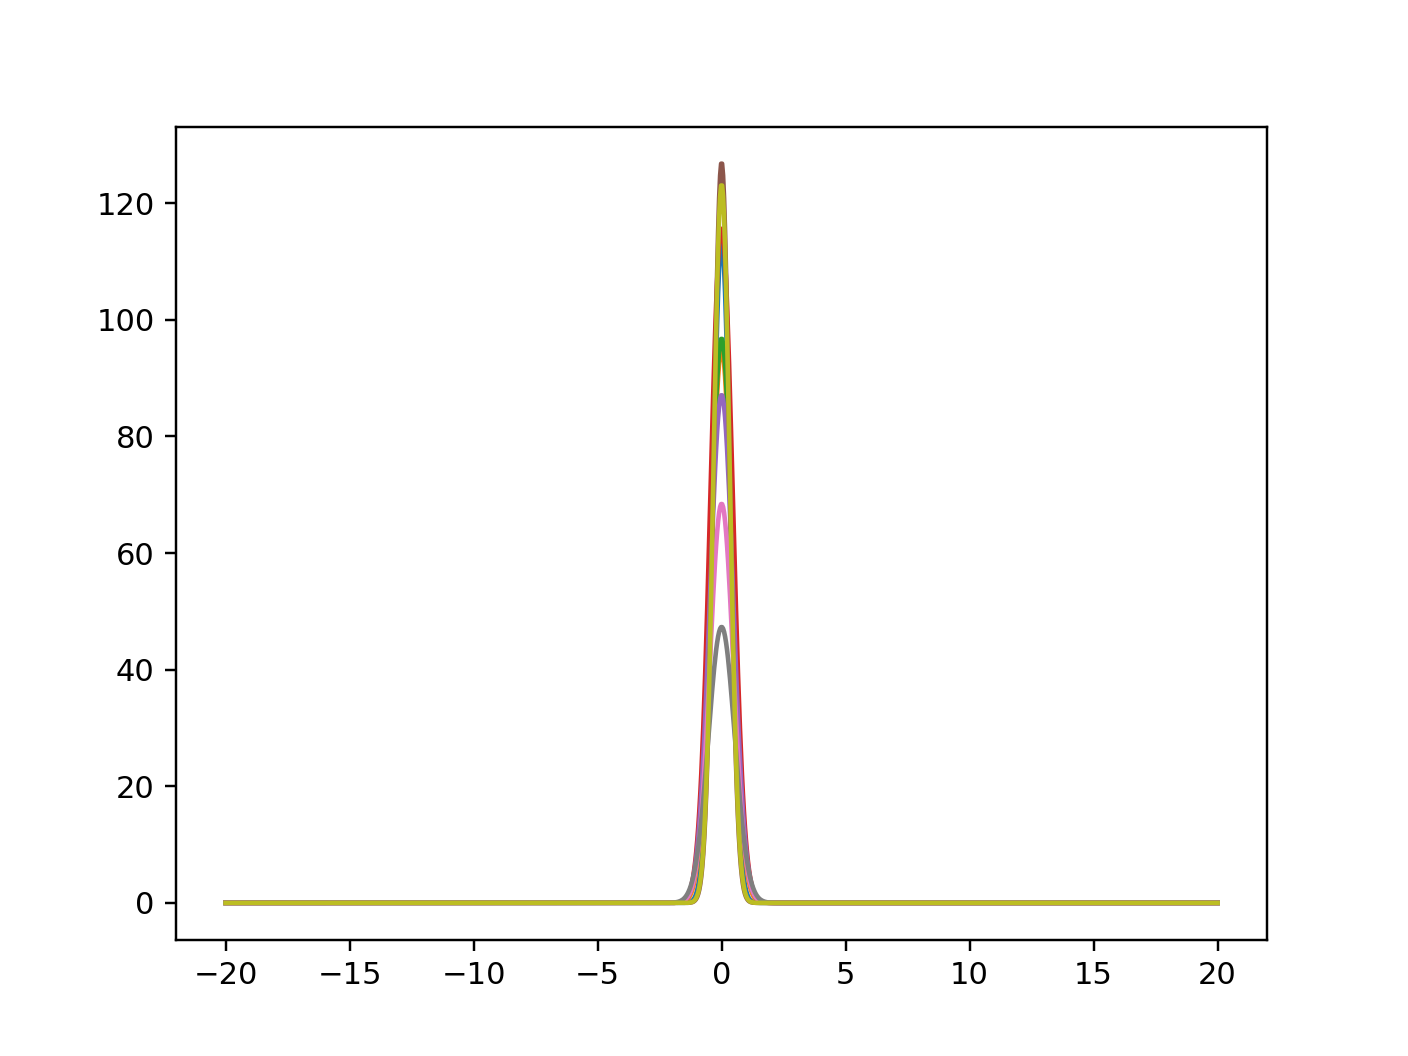

In [38]:
pl.figure()
for i in range(9):
    pl.plot(x,gauss_profile[:,i],label='gauss')

In [ ]:
#code to make/save colormaps

pl.figure()

cmap = mpimg.imread('/Users/marcoaqil/pycortex/filestore/colormaps/Retinotopy_HSV_2x_alpha.png') 
pl.imshow(np.swapaxes(np.fliplr(cmap),0,1))
pl.ylim((62,193))
pl.xlim((0,3))
pl.gca().axes.get_xaxis().set_visible(False)
pl.gca().set_yticks(np.linspace(62,193,5))
pl.gca().set_yticklabels(('$-\pi/2$','$-3\pi/4$','$\pi$','$3\pi/4$','$\pi/2$'))
pl.savefig('/Users/marcoaqil/PRFMapping/Figures/polr_cmap.png', dpi=200, bbox_inches='tight', transparent=True)

pl.figure()

cmap = mpimg.imread('/Users/marcoaqil/pycortex/filestore/colormaps/Jet_2D_alpha.png') 
pl.imshow(np.swapaxes(np.fliplr(cmap),0,1))
pl.xlim((0,5))
pl.gca().axes.get_xaxis().set_visible(False)
pl.gca().set_yticks([255,3*255/3.75,2*255/3.75,1*255/3.75,0])
pl.gca().set_yticklabels(('$0.25\degree$', '$1\degree$', '$2\degree$','$3\degree$','$4\degree$'))
pl.savefig('/Users/marcoaqil/PRFMapping/Figures/ecc_cmap.png', dpi=200, bbox_inches='tight', transparent=True)

pl.figure()

cmap = mpimg.imread('/Users/marcoaqil/pycortex/filestore/colormaps/Jet_2D_alpha.png') 
pl.imshow(np.swapaxes(np.fliplr(cmap),0,1))
pl.xlim((0,5))
pl.gca().axes.get_xaxis().set_visible(False)
pl.gca().set_yticks(np.linspace(255,0,5))
pl.gca().set_yticklabels(np.linspace(0,200,5).astype('int'))
pl.savefig('/Users/marcoaqil/PRFMapping/Figures/Bparam_cmap.png', dpi=200, bbox_inches='tight', transparent=True)

<IPython.core.display.Javascript object>


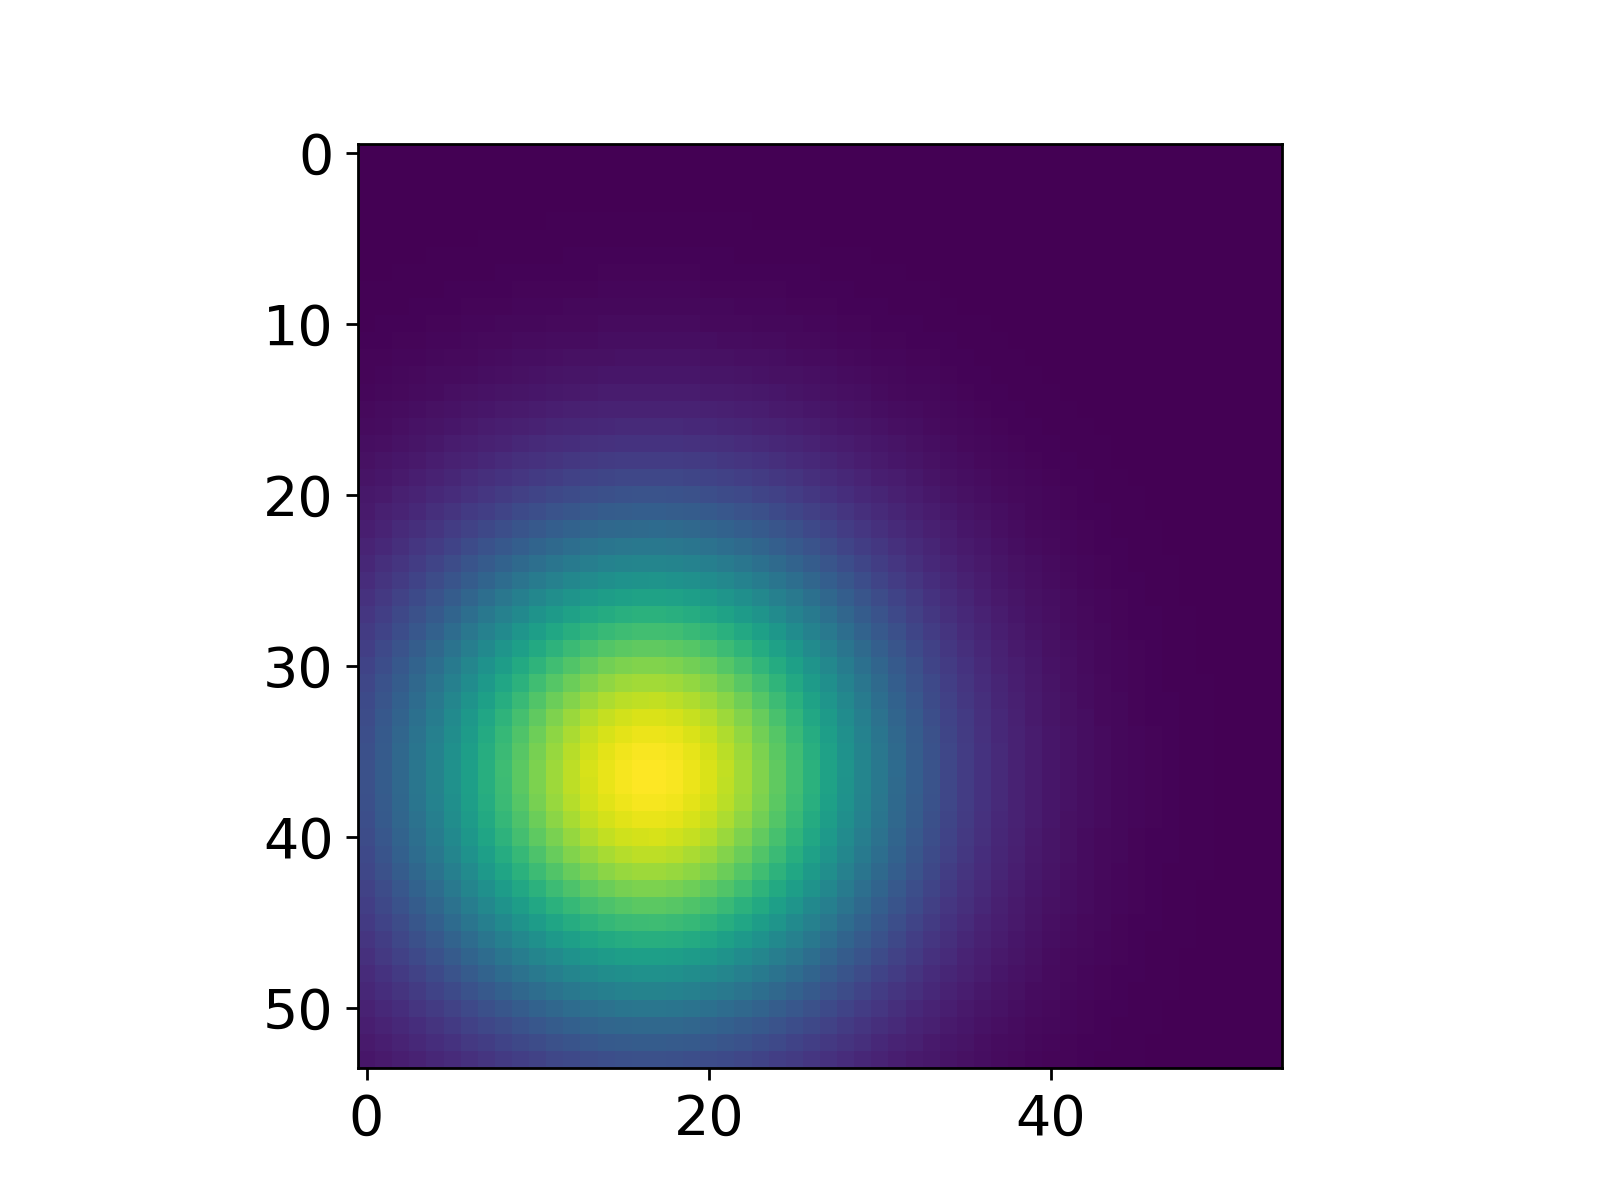

In [202]:
from prfpy.rf import gauss2D_iso_cart
from prfpy.timecourse import stimulus_through_prf
#dm = gg.stimulus.design_matrix

rf = np.rot90(gauss2D_iso_cart(x=gg.stimulus.x_coordinates[..., np.newaxis],
                              y=gg.stimulus.y_coordinates[..., np.newaxis],
                              mu=(-2, -2),
                              sigma=2,
                              normalize_RFs=False).T, axes=(1,2))
#neural_tc = stimulus_through_prf(rf, dm)
#pl.figure()
pl.figure()
pl.imshow(rf[0])

In [205]:
###############outdated cells

71.42857142857143

In [96]:
#correcting for low intensity TCs (lowest xx percentile per ROI) (unused)
tc_mean_full = np.zeros(nonzerovar_mask.shape)
tc_mean = timecourse.mean(-1)
tc_mean_full[nonzerovar_mask]=tc_mean

for roi in idx_rois:
    k_values = int(len(idx_rois[roi])/20)
    lowest_intensity = np.argpartition(tc_mean_full[idx_rois[roi]][tc_mean_full[idx_rois[roi]]>0], k_values)
    alpha[idx_rois[roi][tc_mean_full[idx_rois[roi]]>0][lowest_intensity[:k_values]]] = 0
    
    tc_mean_full[idx_rois[roi][tc_mean_full[idx_rois[roi]]>0][lowest_intensity[:k_values]]] = 0

#plotting histograms of mean signal intensity per ROI, after removing lowest intensity
for roi in idx_rois:
    pl.figure()
    pl.title(roi)
    pl.hist(tc_mean_full[idx_rois[roi]],bins=100)
    pl.show()
    #pl.close()

In [2]:
#load data fsaverage sub 001

gauss = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-gauss_space-fsaverage.npy")
norm_grid = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_gridparams-norm_space-fsaverage.npy") 
norm_an = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_analytic.npy")
#norm_num = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_numerical.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-dog_space-fsaverage.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-css_space-fsaverage.npy")
norm_unbound = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_unbounded.npy")
norm_combined=np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_norm-iterparams-combined_space-fsaverage.npy")
norm_powell=np.load("/Users/marcoaqil/PRFMapping/Cartesius results sub-001/sub-001_iterparams-norm_space-fsaverage_powell.npy")
norm_num_fix = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_num_bounds_fixed.npy")

nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/sub-001_nonzerovar-mask_space-fsaverage.npy")

norm_res = norm_num_fix

#load data fsnative sub 001
gauss = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-gauss_space-fsnative.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-css_space-fsnative.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsnative.npy")
nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_nonzerovar-mask_space-fsnative.npy")
timecourse = np.load('/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_timecourse_space-fsnative.npy')

#load data fsnative sub 006 (old)
gauss = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-gauss_space-fsnative.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-css_space-fsnative.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-norm_space-fsnative.npy")
norm_grid = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_gridparams-norm_space-fsnative.npy")
gauss_grid = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_gridparams-gauss_space-fsnative.npy")

nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_nonlow-var-mask_space-fsnative.npy")

timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_timecourse_space-fsnative.npy')

#load data fsnative20191107120858 sub 006 SMALLER BOUNDS iterated fit (old)
gauss_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_iterparams-gauss_space-fsnative20191107120858.npy")
css_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_iterparams-css_space-fsnative20191107120858.npy")
dog_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_iterparams-dog_space-fsnative20191107120858.npy")
norm_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_iterparams-norm_space-fsnative20191107120858.npy")

nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_nonlow-var-mask_space-fsnative.npy")

timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_timecourse_space-fsnative.npy')

#load data fsnative sub 006 iterated with trust-constr minimizer (old)
gauss_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-gauss_space-fsnative20191106094038.npy")
css_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-css_space-fsnative20191106094038.npy")
dog_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-dog_space-fsnative20191106094038.npy")
norm_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_iterparams-norm_space-fsnative20191106094038.npy")

#nonzerovar_mask_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_nonlow-var-mask_space-fsnative.npy")

#timecourse_it = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-006_timecourse_space-fsnative.npy')

#load data fsnative sub 006 first surr constraints tc first (old)
gauss = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-gauss_space-fsnative.npy")
css_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-css_space-fsnative.npy")
dog_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-norm_space-fsnative.npy")

#load data fsnative sub 006 first surr constraints tc first iterated (old)
gauss_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-gauss_space-fsnative20191108021600.npy")
css_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-css_space-fsnative20191108021600.npy")
dog_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-dog_space-fsnative20191108021600.npy")
norm_res_it = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/surr_constraints_tc_first/sub-006_iterparams-norm_space-fsnative20191108021600.npy")

#load data fsnative sub 007 (old)
gauss = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-gauss_space-fsnative.npy")
css_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-css_space-fsnative.npy")
dog_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-dog_space-fsnative.npy")
norm_res = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_iterparams-norm_space-fsnative.npy")
norm_grid = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_gridparams-norm_space-fsnative.npy")
gauss_grid = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_gridparams-gauss_space-fsnative.npy")

nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_nonlow-var-mask_space-fsnative.npy")
timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/sub-007_timecourse_space-fsnative.npy')

In [ ]:
#plot suppr idx on cortex (not very meaningful)
#suppression index (for norm also take into account baseline?)
suppr_idx = np.zeros((nonzerovar_mask.shape[0],2))
suppr_idx[nonzerovar_mask,0] = (dog_res[:,5] * dog_res[:,6]**2)/(dog_res[:,3] * dog_res[:,2]**2)
suppr_idx[nonzerovar_mask,1] = (norm_res[:,5] * norm_res[:,6]**2 + norm_res[:,7])/(norm_res[:,3] * norm_res[:,2]**2 + norm_res[:,8])

suppr_idx_dog = cortex.Vertex2D(np.log(suppr_idx[:,0]), alpha, subject=subj,
                                vmin=-25, vmax=10, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')
suppr_idx_norm = cortex.Vertex2D(np.log(suppr_idx[:,1]), alpha, subject=subj,
                                 vmin=-12, vmax=2, vmin2=0.2, vmax2=0.6, cmap='Jet_2D_alpha')

ds_suppr_idx = {'suppr_idx DoG':suppr_idx_dog.raw, 'suppr_idx Norm':suppr_idx_norm.raw}

cortex.webgl.show(ds_suppr_idx,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)

In [302]:
#load data sub 006 mean 100 tc fit (with normalized RFs)
normalize_RFs = True
subj='sub-006'
space = 'fsnative'

gauss_grid, norm_grid, gauss, css_res, dog_res, norm_res = combine_results(
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/normalizedRFs', subj, space,
        ['2019-11-20-14-33-34', '2019-11-21-21-08-07',
         '2019-11-21-10-32-09', '2019-11-21-09-23-30'])

#timecourse and mask (from before)
nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_tc/sub-006_mask_space-fsnative.npy")
timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_tc/sub-006_timecourse_space-fsnative.npy')

In [7]:
%%capture

#RSQ
rsq = np.zeros((nonzerovar_mask.shape[0],4))
rsq[nonzerovar_mask,0] = gauss[:,-1]
rsq[nonzerovar_mask,1] = css_res[:, -1]
rsq[nonzerovar_mask,2] = dog_res[:, -1]
rsq[nonzerovar_mask,3] = norm_res[:, -1]

#prf ecc
ecc = np.zeros((nonzerovar_mask.shape[0],4))
ecc[nonzerovar_mask,0] = np.sqrt(gauss[:,0]**2+gauss[:,1]**2)
ecc[nonzerovar_mask,1] = np.sqrt(css_res[:,0]**2+css_res[:,1]**2)
ecc[nonzerovar_mask,2] = np.sqrt(dog_res[:,0]**2+dog_res[:,1]**2)
ecc[nonzerovar_mask,3] = np.sqrt(norm_res[:,0]**2+norm_res[:,1]**2)

#prf polar angle
polar = np.zeros((nonzerovar_mask.shape[0],4))
polar[nonzerovar_mask,0] = np.arctan2(-gauss[:,0], gauss[:,1])
polar[nonzerovar_mask,1] = np.arctan2(-css_res[:,0], css_res[:,1])
polar[nonzerovar_mask,2] = np.arctan2(-dog_res[:,0], dog_res[:,1])
polar[nonzerovar_mask,3] = np.arctan2(-norm_res[:,0], norm_res[:,1])

#prf size
size = np.zeros((nonzerovar_mask.shape[0],4))
size[nonzerovar_mask,0] = gauss[:,2]
size[nonzerovar_mask,1] = css_res[:,2]
size[nonzerovar_mask,2] = dog_res[:,2]
size[nonzerovar_mask,3] = norm_res[:,2]

#prf amplitude
amp = np.zeros((nonzerovar_mask.shape[0],4))
amp[nonzerovar_mask,0] = gauss[:,3]
amp[nonzerovar_mask,1] = css_res[:,3]
amp[nonzerovar_mask,2] = dog_res[:,3]
amp[nonzerovar_mask,3] = norm_res[:,3]

#BOLD baseline
bold_base = np.zeros((nonzerovar_mask.shape[0],4))
bold_base[nonzerovar_mask,0] = gauss[:,4]
bold_base[nonzerovar_mask,1] = css_res[:,4]
bold_base[nonzerovar_mask,2] = dog_res[:,4]
bold_base[nonzerovar_mask,3] = norm_res[:,4]

#css exponent
css_exp = np.zeros(nonzerovar_mask.shape[0])
css_exp[nonzerovar_mask] = css_res[:,5]

#surround amplitude
surr_amp = np.zeros((nonzerovar_mask.shape[0],2))
surr_amp[nonzerovar_mask,0] = dog_res[:,5]
surr_amp[nonzerovar_mask,1] = norm_res[:,5]

#surround size
surr_size = np.zeros((nonzerovar_mask.shape[0],2))
surr_size[nonzerovar_mask,0] = dog_res[:,6]
surr_size[nonzerovar_mask,1] = norm_res[:,6]

#normalization model baselines (neural and surround, ratio, (a+b/(c+d), ad-bc))
baselines = np.zeros((nonzerovar_mask.shape[0],5))
baselines[nonzerovar_mask,0] = norm_res[:,7]
baselines[nonzerovar_mask,1] = norm_res[:,8]
baselines[nonzerovar_mask,2] = norm_res[:,7]/norm_res[:,8]
baselines[nonzerovar_mask,3] = (norm_res[:,3]+norm_res[:,7])/(norm_res[:,5]+norm_res[:,8])
baselines[nonzerovar_mask,4] = (norm_res[:,3]*norm_res[:,8])-(norm_res[:,5]*norm_res[:,7])

#fwhmax fwatmin
fw_hmax = np.zeros((nonzerovar_mask.shape[0],4))
fw_atmin = np.zeros((nonzerovar_mask.shape[0],2))
norm_profiles = np.zeros((1000, nonzerovar_mask.shape[0]))
fw_hmax[nonzerovar_mask,0] = fwhmax_fwatmin('Gauss', gauss, normalize_RFs)
fw_hmax[nonzerovar_mask,1] = fwhmax_fwatmin('CSS', css_res, normalize_RFs)
fw_hmax[nonzerovar_mask,2], fw_atmin[nonzerovar_mask,0] = fwhmax_fwatmin('DoG', dog_res, normalize_RFs)
(fw_hmax[nonzerovar_mask,3], fw_atmin[nonzerovar_mask,1]), norm_profiles[:,nonzerovar_mask] = fwhmax_fwatmin('Norm', norm_res, normalize_RFs,
                                                                                      return_profiles=True)

In [ ]:
#raw time series stats

tc_mean_dict={}
tc_var_dict={}
tc_tsnr_dict={}

for space in spaces:
    for subj in subjects:
        load timecourse_raw and mask_raw
        
    if subj == 'sub-006':
        timecourse_raw = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_timecourse_space-fsnative.npy')
        mask_raw = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/smaller_bounds/sub-006_nonlow-var-mask_space-fsnative.npy")
    elif subj == 'sub-007':
        mask_raw = np.load("/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_fits/sub-007_mask_space-fsnative.npy")
        timecourse_raw = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_fits/sub-007_timecourse_space-fsnative.npy')
    elif subj == 'sub-001':
        mask_raw = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_nonzerovar-mask_space-fsnative.npy")
        timecourse_raw = np.load('/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_timecourse_space-fsnative.npy')

    #calc raw time series mean and plotting histograms of mean signal intensity per ROI
    tc_mean_full = np.zeros(mask_raw.shape)
    tc_mean_full[mask_raw] = timecourse_raw.mean(-1)
    tc_mean_dict[subj] = tc_mean_full
    
    tc_var_full = np.zeros(mask_raw.shape)
    tc_var_full[mask_raw] = timecourse_raw.var(-1)
    tc_var_dict[subj] = tc_var_full
    
    tc_tsnr_full = tc_mean_full/np.sqrt(tc_var_full)  
    tc_tsnr_dict[subj] = tc_tsnr_full
    
    

In [ ]:
norm_params_full = np.zeros((nonzerovar_mask.shape[0],10))
norm_params_full[nonzerovar_mask,:] = np.copy(norm_res)

In [143]:
#output freesurefer-format eccentricity angle maps to draw custom ROIs in freeview
lh_c = read_morph_data(opj(fs_dir, subj+'/surf/lh.curv'))

ecc_freeview = np.median(ecc, axis=-1)

alpha_freeview = rsq.max(-1) * (amp.min(-1)>0) * (tc_mean_full>tc_min) * (ecc.max(-1)<ecc_max) * (ecc.min(-1)>ecc_min)

ecc_freeview[alpha_freeview<0.2] = -10

write_morph_data(opj(fs_dir, subj+'/surf/lh.ecc_masked')
                                       ,ecc_freeview[:lh_c.shape[0]])
write_morph_data(opj(fs_dir, subj+'/surf/rh.ecc_masked')
                                       ,ecc_freeview[lh_c.shape[0]:])

#output freesurefer-format polar angle maps to draw custom ROIs in freeview
lh_c = read_morph_data(opj(fs_dir, subj+'/surf/lh.curv'))

baseline_freeview = baselines[:,0]

alpha_freeview = rsq.max(-1) * (amp.min(-1)>0) * (tc_mean_full>tc_min) * (ecc.max(-1)<ecc_max) * (ecc.min(-1)>ecc_min)

baseline_freeview[alpha_freeview<0.2] = -10

write_morph_data(opj(fs_dir, subj+'/surf/lh.baseline_masked')
                                       ,baseline_freeview[:lh_c.shape[0]])
write_morph_data(opj(fs_dir, subj+'/surf/rh.baseline_masked')
                                       ,baseline_freeview[lh_c.shape[0]:])

In [ ]:
#load data RAW BOLD fit ABC norm model variant (5000tr-con maxiter no constraints)
space = 'fsnative'

main_dict[space]['ABC_raw']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_abc', 
        ['2019-12-02-14-38-20', '2019-12-03-11-03-08',
         '2019-12-03-16-00-08', '2019-12-03-11-45-30'])

main_dict[space]['ABC_raw']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_abc', 
        ['2019-12-02-21-18-45', '2019-12-03-10-46-06',
         '2019-12-03-12-00-44', '2019-12-03-13-23-45'])

#load data MEAN-100-TC fit ABC norm model variant (5000tr-con maxiter. no constraints)
space = 'fsnative'
 
main_dict[space]['ABC_100'][subj]['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_ABC_norm', 
        ['2019-11-30-15-34-05', '2019-12-01-11-15-33',
         '2019-12-01-13-01-26', '2019-12-01-15-26-47'])

main_dict[space]['ABC_100']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_ABC_norm',
        ['2019-11-30-15-33-42', '2019-12-01-11-49-31',
         '2019-12-01-13-32-49', '2019-12-01-15-29-24'])

main_dict[space]['ABC_100']['sub-001']['Results'] = combine_results('sub-001', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_ABC_norm',
        ['2019-12-04-10-45-12', '2019-12-04-14-03-47',
         '2019-12-04-15-55-17', '2019-12-04-21-03-19'])

#load data mean 100 tc fit (ABCD norm)
space = 'fsnative'

main_dict[space]['Standard_100']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_tc',
        ['2019-11-15-11-36-38', '2019-11-16-08-04-40',
         '2019-11-16-11-05-09', '2019-11-15-15-53-43'])

main_dict[space]['Standard_100']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/mean_100_tc',
        ['2019-11-27-11-19-09', '2019-11-28-14-22-27',
         '2019-11-29-12-25-38', '2019-11-29-18-00-53'])

#load data raw data fits (ABCD norm)
space = 'fsnative'
 
main_dict[space]['Standard_raw']['sub-006']['Results'] = combine_results('sub-006', space, 
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_fits',
        ['20191109165849', '20191110131514',
         '20191109100256', '20191109141507'])
 
main_dict[space]['Standard_raw']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_fits', 
        ['', '20191112083058',
         '20191112180440', '20191113094719'])

main_dict[space]['Standard_raw']['sub-001']['Results'] = combine_results('sub-001', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/raw_data_fits', 
        ['2019-11-28-20-50-33', '2019-11-29-14-32-37',
         '2019-11-29-16-10-34', '2019-11-30-11-22-29'])

In [ ]:
#import newly analyzed subject from freesurfer to pycortex database
#this doesnt work anymore. use script in documents folder

cortex.freesurfer.import_subj('sub-006', freesurfer_subject_dir='/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer', 
                              whitematter_surf='smoothwm')

#importing flatmap created with freeview or tksurfer to pycortex database
#cortex.freesurfer.import_flat(subject='sub-006', patch='full', hemis=['lh', 'rh'], 
#                freesurfer_subject_dir='/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/freesurfer', clean=True)

In [311]:
#plotting histograms of tSNR per ROI
#for roi in ["V1","V2","V3"]:
#    pl.figure()
#    pl.title(roi)
#    pl.hist(tsnr_full[idx_rois[roi]],bins=100)
#    pl.show()
#    pl.close()

# different views available, more views can be added  and the
# existing list can be removed
#views = dict(lateral=dict(radius=250, altitude=90.5, azimuth=181, pivot=180),
#             medial=dict(radius=10, altitude=90.5, azimuth=0, pivot=180),
#             front=dict(radius=250, altitude=90.5, azimuth=0, pivot=0),
#             back=dict(radius=250, altitude=90.5, azimuth=181, pivot=0),
#             top=dict(radius=250, altitude=0, azimuth=180, pivot=0),
#             bottom=dict(radius=250, altitude=180, azimuth=0, pivot=0)
#            )

In [74]:
#making t1w nifti images (use nilearn image) (flask to make javascript?)
import nibabel as nib
maskk = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/T1w_results/sub-006_mask_space-T1w.npy')
resxx = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/T1w_results/sub-006_iterparams-norm_space-T1w2019-12-12-15-24-19.npy')
aha = np.zeros(maskk.shape)
aha[maskk] = resxx[:,-1]

ref_img = nib.load('/Users/marcoaqil/Downloads/sub-006_ses-1_task-1R_run-1_space-T1w_desc-brain_mask.nii.gz')
affine, header = ref_img.affine, ref_img.header

nib.Nifti1Image(aha, affine, header).to_filename('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/T1w_results/sub-006_rsq_space-T1w')

xfm_trans = cortex.xfm.Transform(np.identity(4), 
                                    '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/T1w_results/sub-006_rsq_space-T1w.nii')
xfm_trans.save('sub-006', 'func_space-t1w')


vol_data = cortex.Volume2D('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/T1w_results/sub-006_rsq_space-T1w.nii', 
                         '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/T1w_results/sub-006_rsq_space-T1w.nii',
                         'sub-006',
                         'func_space-t1w',
                           vmin=0.2,
                           vmax=0.6,
                           vmin2=0.05,
                           vmax2=0.2,
                          cmap='Jet_2D_alpha')


cortex.webgl.show(vol_data,                  
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=True, 
                 with_borders=True, 
                 with_colorbar=True)


Started server on port 41494


<JS: window.viewer>

Stopping server


In [ ]:
# binned fw_atmin vs other parameters relationships
rsq_thresh = 0.3

colors = {}
colors['custom.V1']= 'black'
colors['custom.V2']= 'red'
colors['custom.V3']= 'pink'

symbol = {}
symbol['Norm. param. B'] = 'o'
symbol['Norm. param. D'] = 'o'
symbol['Ratio (B/D)'] = 'o'
symbol['(A+B)/(C+D)'] = 'o'
symbol['(AD-BC)'] = 'o'


baselines_stats = {}
fw_atmin_stats = {}

for roi in colors:#idx_rois:
    
    baselines_stats[roi] = {}
    fw_atmin_stats[roi] = {}
    
    alpha_roi = (roi_mask(idx_rois[roi],alpha_norm)>rsq_thresh) * (fw_atmin[:,1]<w_max)
    if alpha_roi.sum()>40:    
    
        fw_atmin_sorted = np.argsort(fw_atmin[alpha_roi], axis=0)
        split_fw_atmin_bins = np.array_split(fw_atmin_sorted, 10, axis=0)

        #NOTE: here i indexes different params of same model (above it is same param in different models)
        #therefore fw_atmin_stats is the same for all params
        for i, param in enumerate(symbol):
            pl.figure("fw_atmin vs "+param, figsize=(8, 6))
            #pl.title(subj+' - '+param+' vs Surround size (FWatMin)')
            
            baselines_stats[roi][param]=[]
            fw_atmin_stats[roi][param]=[]

            for fw_atmin_quantile in split_fw_atmin_bins:
                baselines_stats[roi][param].append(weightstats.DescrStatsW(baselines[alpha_roi,i][fw_atmin_quantile[:,1]],
                                                                      weights=rsq[alpha_roi,3][fw_atmin_quantile[:,1]]))

                fw_atmin_stats[roi][param].append(weightstats.DescrStatsW(fw_atmin[alpha_roi,1][fw_atmin_quantile[:,1]],
                                                                      weights=rsq[alpha_roi,3][fw_atmin_quantile[:,1]]))




            plot = pl.errorbar([ss.mean for ss in fw_atmin_stats[roi][param]],
               [ss.mean for ss in baselines_stats[roi][param]],
               yerr=np.array([np.abs(ss.zconfint_mean(alpha=0.05)-ss.mean) for ss in baselines_stats[roi][param]]).T,
               xerr=np.array([np.abs(ss.zconfint_mean(alpha=0.05)-ss.mean) for ss in fw_atmin_stats[roi][param]]).T,
               fmt=symbol[param], mfc=colors[roi], mec='black', label=roi.replace('custom.',''), ecolor=colors[roi])
            #pl.yscale('log')
            pl.legend(loc=0)
            pl.xlabel('Surround size (degrees)')
            pl.ylabel(param)
            
            #pl.xlim(4,15)
            
            #pl.savefig('/Users/marcoaqil/PRFMapping/Figures/'+subj+'_Norm-'+
            #       param.replace("/","")+'-vs-fw_atmin.png', dpi=200, bbox_inches='tight')
            
            
    else:
        print(roi+" has no vertices/voxels above specified rsq threshold")
    
    
    

# binned eccentricity vs other parameters relationships
rsq_thresh = 0.3

ecc_stats = {}
profile_stats = {}


for roi in ['custom.V1', 'custom.V2', 'custom.V3']:#, 'V3A', 'V3B', 'hV4', 'LO1', 'TO1']:#idx_rois:
    
    ecc_stats[roi] = {}
    profile_stats[roi] = {}
    
    alpha_roi = (roi_mask(idx_rois[roi],alpha_norm)>rsq_thresh) 
    if alpha_roi.sum()>40:    
        pl.figure(roi, figsize=(8, 6))
        #pl.title(subj+' '+roi+' Norm profiles')
        ecc_sorted = np.argsort(ecc[alpha_roi], axis=0)
        #mask_ecc_sorted=[]
        #for elem in ecc_sorted[:,3]:
        #    mask_ecc_sorted.append(np.sum(nonzerovar_mask[:elem]))
        #mask_ecc_sorted=np.array(mask_ecc_sorted)    
        split_ecc_bins = np.array_split(ecc_sorted, 4, axis=0)

        ecc_stats[roi] = []
        profile_stats[roi] = []

        for ecc_quantile in split_ecc_bins:

            #hacky as per usual: 3 is the norm model index in ecc and rsq dataset
            ecc_stats[roi].append(weightstats.DescrStatsW(ecc[alpha_roi,3][ecc_quantile[:,3]],
                                                                      weights=rsq[alpha_roi,3][ecc_quantile[:,3]]))
            
            # different ways of calculating the profile VS eccentricity relationship
            #### weighted mean of parameters in each ecc bin
            #norm_bin_mean = weightstats.DescrStatsW(norm_params_full[alpha_roi,:][ecc_quantile[:,3]],
            #                                        weights=rsq[alpha_roi,3][ecc_quantile[:,3]]).mean   
            #bin_profile = fwhmax_fwatmin('Norm', norm_bin_mean, normalize_RFs, return_profiles=True)[1]
            #plot = pl.plot(np.linspace(-50,50,1000)+ecc_stats[roi][-1].mean, bin_profile,
            #              label=f'Ecc={ecc_stats[roi][-1].mean:.2f}')
            


            #### weighted mean of profiles in each eccentricity bin           
            profile_stats[roi].append(weightstats.DescrStatsW(norm_profiles[:,alpha_roi][:,ecc_quantile[:,3]].T,
                                                    weights=rsq[alpha_roi,3][ecc_quantile[:,3]]))
            
            plot = pl.plot(np.linspace(-50,50,1000)+ecc_stats[roi][-1].mean, profile_stats[roi][-1].mean,
                          label=f'Ecc={ecc_stats[roi][-1].mean:.2f}$\degree$')
            
            pl.fill_between(np.linspace(-50,50,1000)+ecc_stats[roi][-1].mean, profile_stats[roi][-1].zconfint_mean(alpha=0.05)[0],
                           profile_stats[roi][-1].zconfint_mean(alpha=0.05)[1], facecolor=plot[0].get_color(),
                           alpha=0.15)
            
            pl.plot(np.linspace(-50,50,1000), np.ones(1000)*plot[0].get_ydata()[-1], color=plot[0].get_color(),
                   linestyle='--', linewidth=1)

        pl.legend(loc=0)
        pl.xlim((0,10))
        pl.xlabel('Eccentricity (degrees)')
        pl.ylabel('Norm pRF profiles')
            
        #pl.savefig('/Users/marcoaqil/PRFMapping/Figures/'+subj+'_'+
        #           roi+'_Norm-profiles.png', dpi=200, bbox_inches='tight')
            
    else:
        print(roi+" has no vertices/voxels above specified rsq threshold")
    
    
    

In [ ]:
# binned fw_hmax vs other parameters relationships
rsq_thresh = 0.3

colors = {}
colors['custom.V1']= 'black'
colors['custom.V2']= 'red'
colors['custom.V3']= 'pink'

symbol = {}
symbol['Norm. param. B'] = 'o'
symbol['Norm. param. D'] = 'o'
symbol['Ratio (B/D)'] = 'o'
symbol['(A+B)/(C+D)'] = 'o'
symbol['(AD-BC)'] = 'o'


baselines_stats = {}
fw_hmax_stats = {}

for roi in colors:#idx_rois:
    
    baselines_stats[roi] = {}
    fw_hmax_stats[roi] = {}
    
    alpha_roi = (roi_mask(idx_rois[roi],alpha_norm)>rsq_thresh) * (fw_atmin[:,1]<w_max)
    if alpha_roi.sum()>40:    
    
        fw_hmax_sorted = np.argsort(fw_hmax[alpha_roi], axis=0)
        split_fw_hmax_bins = np.array_split(fw_hmax_sorted, 10, axis=0)

        #note: here i indexes different params of same model (above it is same param in different models)
        #therefore fw_hmax_stats is the same for all params
        for i, param in enumerate(symbol):
            pl.figure("fwhmax vs "+param, figsize=(8, 6))
            #pl.title(subj+' - '+param+' vs pRF size (FWHM)')
            
            baselines_stats[roi][param]=[]
            fw_hmax_stats[roi][param]=[]

            for fw_hmax_quantile in split_fw_hmax_bins:
                baselines_stats[roi][param].append(weightstats.DescrStatsW(baselines[alpha_roi,i][fw_hmax_quantile[:,3]],
                                                                      weights=rsq[alpha_roi,3][fw_hmax_quantile[:,3]]))

                fw_hmax_stats[roi][param].append(weightstats.DescrStatsW(fw_hmax[alpha_roi,3][fw_hmax_quantile[:,3]],
                                                                      weights=rsq[alpha_roi,3][fw_hmax_quantile[:,3]]))




            plot = pl.errorbar([ss.mean for ss in fw_hmax_stats[roi][param]],
               [ss.mean for ss in baselines_stats[roi][param]],
               yerr=np.array([np.abs(ss.zconfint_mean(alpha=0.05)-ss.mean) for ss in baselines_stats[roi][param]]).T,
               xerr=np.array([np.abs(ss.zconfint_mean(alpha=0.05)-ss.mean) for ss in fw_hmax_stats[roi][param]]).T,
               fmt=symbol[param], mfc=colors[roi], mec='black', label=roi.replace('custom.',''), ecolor=colors[roi])
            
            #pl.plot([ss.mean for ss in fw_hmax_stats[roi][param]],0.1*np.array([ss.mean for ss in fw_hmax_stats[roi][param]])**2)
            #pl.yscale('log')
            pl.legend(loc=0)
            pl.xlabel('pRF size (degrees)')
            pl.ylabel(param)
            
            #pl.savefig('/Users/marcoaqil/PRFMapping/Figures/'+subj+'_Norm-'+
            #       param.replace("/","").replace('.','').replace(' ','_')+'-vs-fw_hmax.png', dpi=200, bbox_inches='tight')
    else:
        print(roi+" has no vertices/voxels above specified rsq threshold")
    
    
    

In [18]:
#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#mr hrf fitting. unfiltered predictions!
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_unfiltpred']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/old results/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/unfiltpred/',
        [['2020-03-21-16-57-31', '2020-03-21-21-30-26',
         '2020-03-21-22-30-59', '2020-03-21-22-52-52']])

[Errno 2] No such file or directory: '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/old results/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/unfiltpred/sub-006_mask_space-fsnative2020-03-21-16-57-31.npy'
11730
(613665,)
11730
12655


In [471]:
#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#mr hrf fitting. lowpassed away the last 114 eigenmodes (30 percent). unfiltered predictions!
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_lowpass114_unfiltpred']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/lasteigenmodes114/unfiltpred/',
        ['2020-03-20-17-14-22', '2020-03-20-22-13-19',
         '2020-03-20-22-25-19', '2020-03-20-23-15-27'])

#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#mr hrf fitting. lowpassed away the last 114 eigenmodes (30 percent)
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_lowpass114']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/lasteigenmodes114/',
        ['2020-03-18-23-13-04', '2020-03-19-09-10-22',
         '2020-03-19-11-11-25', '2020-03-19-11-45-57'])

#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#mr hrf fitting. lowpassed away the last 76 eigenmodes (20 percent) (called it 72 by mistake)
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_lowpass72']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/lasteigenmodes72/',
        ['2020-03-18-16-46-37', '2020-03-18-19-05-44',
         '2020-03-18-19-44-04', '2020-03-18-20-32-46'])

#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#mr hrf fitting. lowpassed away the last 38 eigenmodes (10 percent)
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf_lowpass38']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/lasteigenmodes38/',
        ['2020-03-18-12-42-34', '2020-03-18-14-25-45',
         '2020-03-18-14-34-50', '2020-03-18-15-02-00'])

#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#no hrf fitting
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_nohrf']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/no_hrf/',
        ['2020-03-18-08-57-30', '2020-03-18-09-56-51',
         '2020-03-18-10-01-54', '2020-03-18-10-19-08'])

#load crossvalidated results PSC BOLD fit ABD norm. 1S cond. dcfilter interbar baseline, run mean not median
#mrvista style hrf fitting (keep hrf param fixed in second stage and only refit prf)
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean_mrhrf']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/mr_hrf/',
        ['2020-03-17-10-53-46', '2020-03-17-13-27-09',
         '2020-03-17-14-02-25', '2020-03-17-14-27-41'])

#load crossvalidated results PSC BOLD fit ABD norm model variant 1S condition dcfilter interbar baseline, run mean not median
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar_runmean']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/runmean/',
        ['2020-03-16-11-33-26', '2020-03-16-13-51-16',
         '2020-03-16-14-06-16', '2020-03-16-14-35-10'])

#load crossvalidated results PSC BOLD fit ABD norm model variant 1S condition only dcfilter interbar baseline
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S_dcfilter_interbar']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/fixed_bold_baseline_interbar_dcfilter/',
        ['2020-03-13-15-35-58', '2020-03-14-01-25-17',
         '2020-03-14-09-18-20', '2020-03-14-11-45-24'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant 1S condition only dcfilter not fixed bold baseline
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100_1S_dcfilter_interbar']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD/dc_filter/',
        ['2020-03-13-00-41-56', '2020-03-13-09-27-08',
         '2020-03-13-10-01-18', '2020-03-13-10-32-14'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant 1S condition only dcfilter interbar baseline
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100_fixed_bold_baseline_1S_dcfilter_interbar']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD/fixed_bold_baseline/1S_only/dc_filter/interbar_baseline/',
        ['2020-03-11-16-05-40', '2020-03-12-08-08-56',
         '2020-03-12-11-52-40', '2020-03-12-13-21-14'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant 1S condition only polyorder 1 interbar baseline
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100_fixed_bold_baseline_1S_poly1_interbar']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD/fixed_bold_baseline/1S_only/polyorder_1/interbar_baseline/',
        ['2020-03-09-12-39-27', '2020-03-09-17-09-25',
         '2020-03-09-18-06-14', '2020-03-10-08-51-31'])


#load crossvalidated results PSC BOLD fit ABCD norm model variant 1S condition only polyorder 1
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100_fixed_bold_baseline_1S_poly1']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD/fixed_bold_baseline/1S_only/polyorder_1/',
        ['2020-03-05-11-50-17', '2020-03-05-14-25-44',
         '2020-03-05-15-09-15', '2020-03-05-16-13-53'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant 1S condition only
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100_fixed_bold_baseline_1S']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD/fixed_bold_baseline/1S_only/',
        ['2020-03-04-17-32-33', '2020-03-04-21-28-41',
         '2020-03-04-22-32-02', '2020-03-04-23-29-29'])

#load crossvalidated results PSC BOLD fit ABD norm model variant 1S condition only
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline_1S']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/1S_only/',
        ['2020-03-03-17-39-48'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant
space = 'fsnative'

vis_res.main_dict[space]['ABD_100_fixed_bold_baseline']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABD/',
        ['2020-03-03-11-32-25'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100_fixed_bold_baseline']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD/fixed_bold_baseline/',
        ['2020-02-25-15-23-50'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant
space = 'fsnative'

vis_res.main_dict[space]['ABCD_100']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD',
        ['2020-02-05-17-27-16', '2020-02-05-17-37-03', '2020-02-08-11-02-24',
         '2020-02-09-12-55-59', '2020-02-09-20-05-56'],
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/sub-006_timecourse-raw_space-fsnative.npy')

%%capture
#load crossvalidated results PSC BOLD fit ABC norm model variant
space = 'fsnative'

vis_res.main_dict[space]['ABC_100']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABC',
          ['2020-02-10-01-09-28', '2020-02-10-09-12-40', 
         '2020-02-10-09-37-55', '02-10-11-30-44'])

%%capture
#load crossvalidated results PSC BOLD fit ACD norm model variant
space = 'fsnative'

vis_res.main_dict[space]['ACD_100']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ACD',
        ['2020-02-10-17-59-24', '2020-02-11-07-55-07',
         '2020-02-11-14-30-41', '2020-02-12-06-46-13'])

#load crossvalidated results PSC BOLD fit ABCD norm model variant
space = 'T1w'

vis_res.main_dict[space]['ABCD_100']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/mean_100_ABCD_T1w',
        ['2020-02-13-00-14-59', '2020-02-13-23-54-19',
         '2020-02-14-08-28-59', '2020-02-14-19-00-05'],
        ref_img_path='/Users/marcoaqil/Downloads/sub-006_ses-1_task-1R_run-1_space-T1w_desc-brain_mask.nii.gz')

In [ ]:
space = 'fsnative'

vis_res.main_dict[space]['ABCD_1S_5050']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/',
             [['2020-04-10-20-48-09'],['2020-04-10-22-15-12'],['2020-04-10-23-39-57'],['2020-04-11-01-38-17'],
              ['2020-04-11-03-22-03'],['2020-04-11-04-16-37'],['2020-04-11-21-25-10'],['2020-04-11-23-55-07']])   

vis_res.main_dict[space]['ABCD_1S_LOO']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/LOO/',
             [['2020-04-09-19-56-06'],['2020-04-09-21-30-20'],['2020-04-10-02-23-52'],
              ['2020-04-10-12-53-29'],['2020-04-10-14-32-32'],['2020-04-10-17-13-35']])

vis_res.main_dict[space]['ABCD_1S_5050']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/',
             [['2020-04-10-20-27-53'],['2020-04-10-22-15-09'],['2020-04-10-23-39-54'],['2020-04-11-01-38-44'],
              ['2020-04-11-03-22-36'],['2020-04-11-04-14-41'],['2020-04-11-19-18-36'],['2020-04-11-22-39-50']]) 

vis_res.main_dict[space]['ABCD_1S_LOO']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/LOO/',
             [['2020-04-09-20-20-44'],['2020-04-09-21-31-32'],['2020-04-10-02-24-00'],
              ['2020-04-10-12-55-47'],['2020-04-10-15-01-54'],['2020-04-10-17-42-43']])  

In [21]:
nc=[]
for elem in ['2020-04-10-20-48-09','2020-04-10-23-39-57',
              '2020-04-11-03-22-03','2020-04-11-21-25-10']:
    timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/sub-006_timecourse_space-fsnative'+elem+'.npy')
    timecourse_test = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/sub-006_timecourse-test_space-fsnative'+elem+'.npy')
    mask = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/sub-006_mask_space-fsnative'+elem+'.npy')
    
    n_timepoints = timecourse.shape[-1]
    noise_ceiling_scaled_odd = []
    noise_ceiling_scaled_even = []

    vox_data = timecourse
    prediction = timecourse_test

    for i in range(timecourse.shape[0]):

        sum_pred = np.sum(prediction[i])
        square_norm_pred = np.linalg.norm(prediction[i], ord=2)**2    
        sumd = np.sum(vox_data[i])    

        best_slope = (n_timepoints * np.dot(vox_data[i], prediction[i].T) - sumd *
              sum_pred) / (n_timepoints * square_norm_pred - sum_pred**2)
        best_baseline = (sumd - best_slope * sum_pred) / n_timepoints

        scaled_pred = prediction[i]*best_slope + best_baseline

        rsq = 1-np.sum((vox_data[i]-scaled_pred)**2, axis=-1)/(vox_data[i].shape[-1]*vox_data[i].var(-1))

        noise_ceiling_scaled_odd.append(rsq)

    vox_data = timecourse_test
    prediction = timecourse

    for i in range(timecourse.shape[0]):

        sum_pred = np.sum(prediction[i])
        square_norm_pred = np.linalg.norm(prediction[i], ord=2)**2    
        sumd = np.sum(vox_data[i])    

        best_slope = (n_timepoints * np.dot(vox_data[i], prediction[i].T) - sumd *
              sum_pred) / (n_timepoints * square_norm_pred - sum_pred**2)
        best_baseline = (sumd - best_slope * sum_pred) / n_timepoints

        scaled_pred = prediction[i]*best_slope + best_baseline

        rsq = 1-np.sum((vox_data[i]-scaled_pred)**2, axis=-1)/(vox_data[i].shape[-1]*vox_data[i].var(-1))

        noise_ceiling_scaled_even.append(rsq)   


    noise_ceiling_scaled_odd = np.array(noise_ceiling_scaled_odd)
    noise_ceiling_scaled_even = np.array(noise_ceiling_scaled_even)
    
    noise_ceiling_full_o = np.zeros(mask.shape)
    noise_ceiling_full_e = np.zeros(mask.shape)
    noise_ceiling_full_o[mask] = noise_ceiling_scaled_odd
    noise_ceiling_full_e[mask] = noise_ceiling_scaled_even
    nc.append(noise_ceiling_full_e)
    nc.append(noise_ceiling_full_o)
    
nc_median = np.median(nc, axis=0)   

nc=[]
for elem in ['2020-04-10-20-48-09','2020-04-10-23-39-57',
              '2020-04-11-03-22-03','2020-04-11-21-25-10']:
    timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/sub-006_timecourse_space-fsnative'+elem+'.npy')
    timecourse_test = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/sub-006_timecourse-test_space-fsnative'+elem+'.npy')
    mask = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/sub-006_mask_space-fsnative'+elem+'.npy')
    
    noise_ceiling_odd = 1-np.sum((timecourse_test-timecourse)**2, axis=-1)/(timecourse_test.shape[-1]*timecourse_test.var(-1))
    noise_ceiling_even = 1-np.sum((timecourse-timecourse_test)**2, axis=-1)/(timecourse.shape[-1]*timecourse.var(-1))

    noise_ceiling_full_o = np.zeros(mask.shape)
    noise_ceiling_full_e = np.zeros(mask.shape)
    noise_ceiling_full_o[mask] = noise_ceiling_odd
    noise_ceiling_full_e[mask] = noise_ceiling_even
    nc.append(noise_ceiling_full_e)
    nc.append(noise_ceiling_full_o)
    
nc_median = np.median(nc, axis=0)  

vis_res.main_dict['fsnative']['ABCD_1S_5050']['sub-006']['Processed Results']['Noise Ceiling']['Noise Ceiling'] = nc_median

nc=[]
for elem in ['2020-04-09-19-56-06', '2020-04-09-21-30-20','2020-04-10-02-23-52',
              '2020-04-10-12-53-29','2020-04-10-14-32-32','2020-04-10-17-13-35']:
    timecourse = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/LOO/sub-006_timecourse_space-fsnative'+elem+'.npy')
    timecourse_test = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/LOO/sub-006_timecourse-test_space-fsnative'+elem+'.npy')
    mask = np.load('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/LOO/sub-006_mask_space-fsnative'+elem+'.npy')
    
    noise_ceiling = 1-np.sum((timecourse_test-timecourse)**2, axis=-1)/(timecourse_test.shape[-1]*timecourse_test.var(-1))

    noise_ceiling_full = np.zeros(mask.shape)
    noise_ceiling_full[mask] = noise_ceiling
    nc.append(noise_ceiling_full)
    
nc_median = np.median(nc, axis=0)  

vis_res.main_dict['fsnative']['ABCD_1S_LOO']['sub-006']['Processed Results']['Noise Ceiling']['Noise Ceiling'] = nc_median

In [154]:
space = 'fsnative'

vis_res.main_dict[space]['ABCD_1S_5050']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/',
             [['2020-04-10-20-48-09'],['2020-04-10-23-39-57'],
              ['2020-04-11-03-22-03'],['2020-04-11-21-25-10']])   

vis_res.main_dict[space]['ABCD_1S_LOO']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/LOO/',
             [['2020-04-09-19-56-06'],['2020-04-09-21-30-20'],['2020-04-10-02-23-52'],
              ['2020-04-10-12-53-29'],['2020-04-10-14-32-32'],['2020-04-10-17-13-35']])

vis_res.main_dict[space]['ABCD_1S_5050']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/',
             [['2020-04-10-20-27-53'],['2020-04-10-23-39-54'],
              ['2020-04-11-03-22-36'],['2020-04-11-19-18-36']]) 

vis_res.main_dict[space]['ABCD_1S_LOO']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/LOO/',
             [['2020-04-09-20-20-44'],['2020-04-09-21-31-32'],['2020-04-10-02-24-00'],
              ['2020-04-10-12-55-47'],['2020-04-10-15-01-54'],['2020-04-10-17-42-43']])  

space = 'fsnative'

vis_res.main_dict[space]['ABD_1S_smallbounds']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABD_1S_smallbounds/',
             [['2020-04-08-18-23-37'],
              ['2020-04-09-02-50-02']])   

vis_res.main_dict[space]['ABD_1S_smallbounds']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABD_1S_smallbounds/',
             [['2020-04-08-22-33-41'],
              ['2020-04-09-01-03-32']])     

space = 'fsnative'

vis_res.main_dict[space]['ABD_1S']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABD_1S/',
             [['2020-04-07-20-08-44','2020-04-08-00-06-16',
               '2020-04-08-02-55-43','2020-04-08-03-41-53'],
              ['2020-04-05-23-21-57','2020-04-06-19-33-13',
              '2020-04-07-01-13-14','2020-04-07-13-29-40']])   

vis_res.main_dict[space]['ABD_1S']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABD_1S/',
             [['2020-04-07-18-00-08','2020-04-08-00-54-17',
              '2020-04-08-02-49-36','2020-04-08-03-41-50'],
              ['2020-04-06-04-36-48','2020-04-06-20-59-14',
                '2020-04-07-02-34-43','2020-04-07-11-59-39']])      

#load whole-brain (no CV) results for drawing ROIs. current standard settings.
space = 'fsnative'

vis_res.main_dict[space]['ROI_drawing']['sub-006']['Results'] = combine_results('sub-006', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/ROI_drawing/',
        [['2020-04-05-16-20-54']],
    '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/ROI_drawing/sub-006_timecourse-raw_space-fsnative.npy')


vis_res.main_dict[space]['ROI_drawing']['sub-007']['Results'] = combine_results('sub-007', space,
        '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/ROI_drawing/',
        [['2020-04-05-12-23-42']],
    '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/ROI_drawing/sub-007_timecourse-raw_space-fsnative.npy')

[Errno 2] No such file or directory: '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/sub-006_mask_space-fsnative.npy'
gauss iter 8119
gauss fold 8119
(312694,)
[38266]
38266
gauss median 8119
norm median 8987
[Errno 2] No such file or directory: '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/sub-006_mask_space-fsnative.npy'
gauss in mask: 8119
norm in mask: 8987
[Errno 2] No such file or directory: '/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/LOO/sub-006_mask_space-fsnative.npy'
gauss iter 3082
gauss fold 3082
(312694,)
gauss iter 3113
gauss fold 3113
(312694,)
gauss iter 2904
gauss fold 2904
(312694,)
gauss iter 4173
gauss fold 4173
(312694,)
gauss iter 3609
gauss fold 3609
(312694,)
gauss iter 3347
gauss fold 3347
(312694,)
[38266, 38266, 38266, 38266, 38266, 38266]
38266
gauss median 3389
norm median 3797
[Errno 2] No such file or directory: '/Users/marcoaqil/PRFMapping/PRFMapping-De

In [177]:
tcs_fold = tcs
beta_folds = dd(list)
rsq_folds = dd(list)
mean_tc = np.mean(tcs_fold, axis=0)

d = len(tcs_fold)
M = tcs_fold[0].shape[-1]

#response power
sigma_s = np.mean([(el**2).mean(-1) for el in tcs_fold], axis=0)

#estimated noise power
sigma_eta = (d/(d-1)) * (sigma_s - (np.mean(tcs_fold, axis=0)**2).mean(-1))

for model in ["Gauss", "CSS", "DoG", "Norm"]:
    pred = preds[model] - preds[model].mean(-1)[...,np.newaxis]
    
    #residual error power
    sigma_e = np.mean([((pred-elem)**2).mean(-1) for elem in tcs_fold], axis=0) 
    
    #numerator is predictive power; denominator is signal power
    beta = (sigma_s - sigma_e)/(sigma_s - sigma_eta)
    beta_folds[model].append(beta)
    
    rsq_folds[model].append(1-np.sum((pred-mean_tc)**2, axis=-1)/(mean_tc.var(-1)*mean_tc.shape[-1]))

/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/Users/marcoaqil/anaconda3/envs/prfpy_intel_env/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


In [158]:
subj_res = vis_res.main_dict['fsnative']['ABCD_1S_5050']['sub-006']

beta_folds = dd(list)

for elem in ['2020-04-10-20-48-09']:
    with open('/Users/marcoaqil/PRFMapping/PRFMapping-Deriv-hires/prfpy/CV_results/ABCD_1S/5050/sub-006_analysis_settings'+elem+'.yml') as f:
        idx = yaml.safe_load(f)['fit_runs']
    idx_test = [index for index in tcs_idx if index not in idx]
    
    tcs_fold = [tcs[i] for i in idx_test]
    d = len(tcs_fold)
    M = tcs_fold[0].shape[-1]
    
    sigma_s = np.mean([(el**2).sum(-1)/M for el in tcs_fold], axis=0)
    sigma_eta = (d/(d-1)) * (sigma_s - (np.mean(tcs_fold, axis=0)**2).sum(-1)/M)
    
    for model in ["Gauss", "CSS", "DoG", "Norm"]:
        pred = preds[model] - preds[model].mean(-1)[...,np.newaxis]
    
        sigma_e = np.mean([((pred-elem)**2).sum(-1)/M for elem in tcs_fold], axis=0) 
    
        beta = (sigma_s - sigma_e)/(sigma_s - sigma_eta)
        beta_folds[model].append(beta)

In [173]:
beta_median = {model:np.median(beta_folds[model], axis=0) for model in beta_folds}

beta_median_full = dd(lambda:np.zeros(mask.shape))
for model in ["Gauss", "CSS", "DoG", "Norm"]:
    beta_median_full[model][mask] = beta_median[model]
        

In [178]:
rsq_median = {model:np.median(rsq_folds[model], axis=0) for model in rsq_folds}

rsq_median_full = dd(lambda:np.zeros(mask.shape))
for model in ["Gauss", "CSS", "DoG", "Norm"]:
    rsq_median_full[model][mask] = rsq_median[model]

<IPython.core.display.Javascript object>


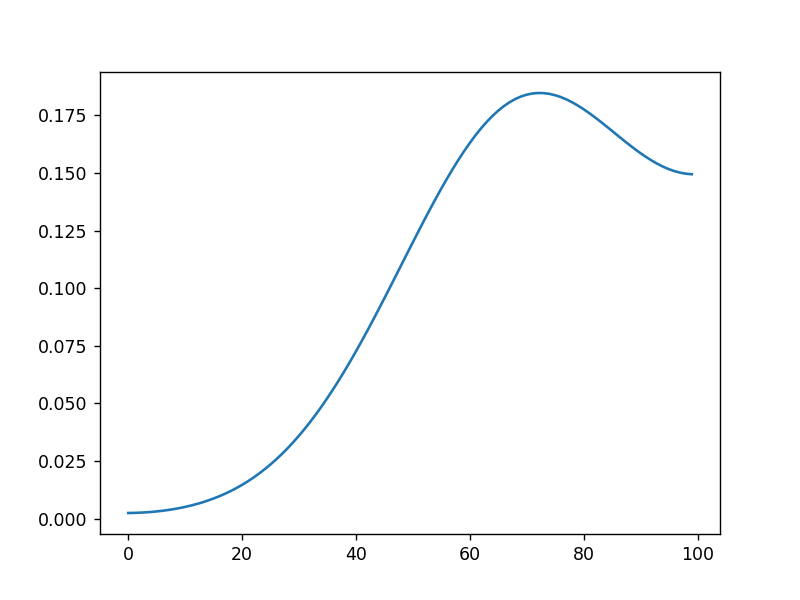

In [14]:
import scipy as sp
gridsize=100
diagonals = [np.ones(gridsize-1),np.zeros(gridsize+1),np.ones(gridsize-1)]
#1D grid-graph
AdjMatrix = sp.sparse.diags(diagonals,[-1,0,1]).toarray()
Deg=np.sum(AdjMatrix, axis=0)
Degree_Matrix=sp.sparse.diags(Deg)
regLap = Degree_Matrix - sp.sparse.csc_matrix(AdjMatrix)
#unnormalized laplacian
Laplacian=-regLap.toarray()
s,U=np.linalg.eigh(Laplacian)
s[-1]=0
s=s[::-1]
U=U[:,::-1]

pl.figure()
u_0=np.zeros(100)
u_0[70]=10
ker = np.dot(U,np.dot(np.diag(np.exp(s*250)),U.T))
gauss=np.dot(ker,u_0)
pl.plot(gauss)
param = np.dot(U.T,gauss)

<IPython.core.display.Javascript object>


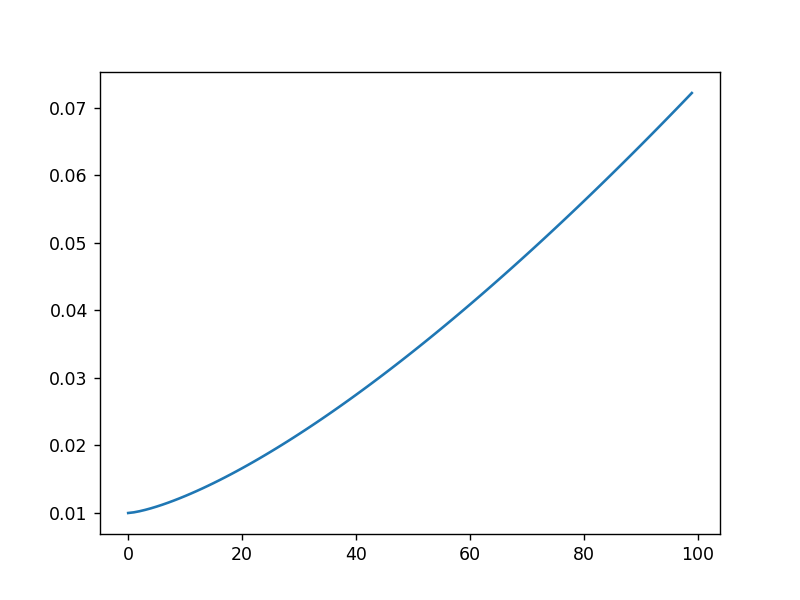

In [20]:
pl.figure()
param = np.arange(100)**1.4*0.0001+0.01
pl.plot(param)

<IPython.core.display.Javascript object>


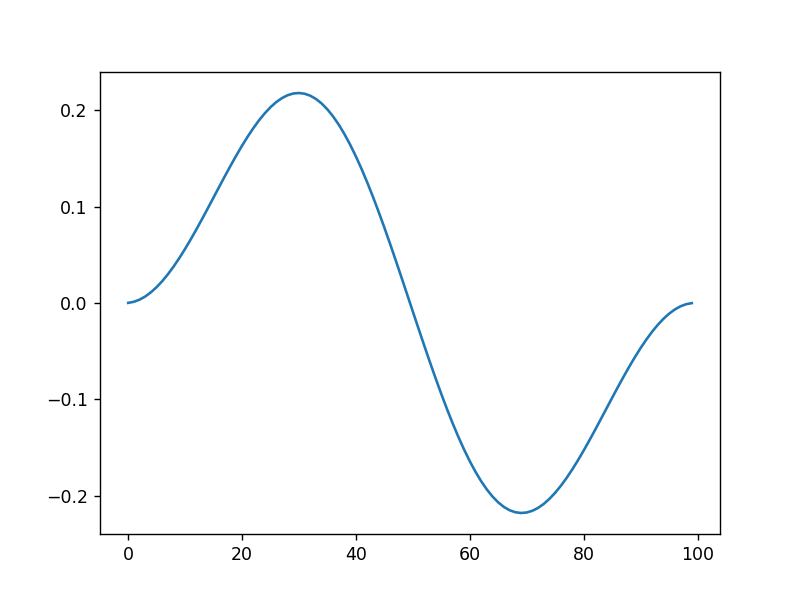

In [42]:
pl.figure()
pl.plot(U[:,3]+U[:,1])

<IPython.core.display.Javascript object>


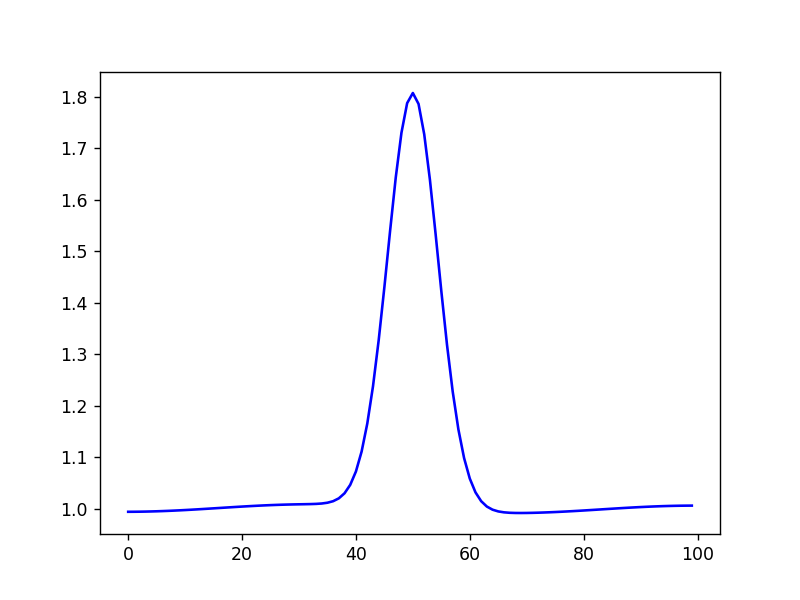

In [44]:
fig_sim = pl.figure()
ax = fig_sim.add_subplot(111)
u_0=np.ones(100)
u_0[50]=10
#u_0[80]=10
delta_t=np.ones(100)*0.1#param#np.dot(U.T,param)#0.01#np.dot(U.T,param)
delta_t[1]=10
delta_t[3]=10
ker = np.dot(U,np.dot(np.diag(np.exp(s*delta_t)),U.T))


for i in range(0,100):
    u_Delta_t = np.dot(ker,u_0)
    time.sleep(0.1)
    ax.clear()
    ax.plot(u_Delta_t, 'b-')           
    fig_sim.canvas.draw()
    fig_sim.canvas.flush_events()
    u_0=np.copy(u_Delta_t)
    

In [ ]:
#ECC-SURROUND SIZE
save_figures = False
rsq_thresh = 0.4
rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.LO','custom.TO']
analysis_names=['fit-task-all_fit-runs-5050CVmedian']
vis_res.set_alpha(only_models=['Gauss', 'DoG', 'CSS', 'Norm_abcd'])
vis_res.ecc_surround_roi_plots(rois, rsq_thresh, save_figures, analysis_names=analysis_names)

#NORM BASELINES
save_figures = False
rsq_thresh = 0.25
analysis_names=['fit-task-all_fit-runs-all']
rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.LO','custom.TO']#, 'custom.hV4','custom.VO',#,#'custom.hV4','custom.VO']#,
                     # 'custom.hV4','custom.VO','custom.V3AB','custom.LO','custom.TO','custom.IPS']
vis_res.set_alpha(only_models=['Gauss', 'DoG', 'CSS', 'Norm_abcd'])
vis_res.ecc_norm_baselines_roi_plots(rois, rsq_thresh, save_figures, analysis_names=analysis_names)

#CSS EXP
save_figures = False
rsq_thresh = 0.4
rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.LO','custom.TO']
vis_res.set_alpha()
vis_res.ecc_css_exp_roi_plots(rois, rsq_thresh, save_figures)

In [ ]:
#this is to always set the alpha correctly
vis_res.set_alpha(only_models=['Gauss', 'DoG', 'CSS', 'Norm_abcd'])

save_figures = False
rsq_thresh = 0.0
analysis_names=['fit-task-all_fit-runs-5050CVmedian']
rois = rois = ['custom.V1', 'custom.V2', 'custom.V3', 
        'custom.V3AB', 'custom.hV4', 'custom.LO',
        'custom.IPS', 'custom.VO', 'custom.TO']
        #,'custom.IPS']#,'custom.FO']

vis_res.rsq_roi_plots(rois, rsq_thresh, save_figures, analysis_names=analysis_names, 
                      plot_hist=False, print_stats=False)